In [1]:
import numpy as np
import pandas as pd
import re

from IPython.display import display
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize  
from collections import Counter
import string

from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.utils import pprint
from konlpy.tag import Twitter

import os

from tqdm import tqdm
import ast

from gensim.models import Word2Vec
import random

from sklearn.decomposition import PCA

In [7]:
twitter = Twitter()

C:\Users\Samsung\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
file_list = os.listdir(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data")
file_list_xlsx = [f for f in file_list if f.endswith(".xlsx")]
file_naver = [f for f in file_list_xlsx if f.endswith("네이버.xlsx")]
file_insta = [f for f in file_list_xlsx if f.endswith("인스타그램.xlsx")]

# 1. Data loading & POS taggin

In [5]:
f_1 = file_naver[0]
f_1

'01 스킨 케어_네이버.xlsx'

In [6]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:54<00:00,  1.03it/s]


In [165]:
f_1 = file_insta[0]
f_1

'01 스킨 케어_인스타그램.xlsx'

In [166]:
d_12 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))

In [168]:
d_12.head()
d_12["insta_count"].sum()

2403

In [7]:
d_1.head()

,브랜드명,브랜드명(영문),제품명(한글),제품명(영문),출시일자,기타,naver_blog_count,naver_blog_review,tag,words
0,로라메르시에,Laura Mercier,퓨리파잉 미셀라 워터,Purifying micellar water,20.05,#스킨케어에센셜컬렉션,0,[],"[([], Punctuation)]",[[]]
1,이니스프리,innisfree,애플씨드 립앤아이 리무버,Apple Seed Lip&Eye Remover,2019년 디자인 AD,"#애플씨드립앤아이리무버, #애플씨드, #애플씨드클렌징오일",159,['로드샵 중 가장 자주 이용하는 곳이 아닐까 싶은 이니스프리그러다 보니 공병도 자...,"[([', Punctuation), (로드, Noun), (샵, Suffix), (...","[[', 로드, 샵, 중, 가장, 자주, 이용, 하는, 곳, 이, 아닐까, 싶은, ..."
2,포인트,POINT,딥클린 비타 휩 클렌징폼,deep clean vitawhip cleansing foam,2020.05,톤업클렌저,22,"['안녕하세요 뷰티블로거 라벤더에요 :)이미 시작된 여름, 자외선이 한층 강해지면서...","[([', Punctuation), (안녕하세요, Adjective), (뷰티, N...","[[', 안녕하세요, 뷰티, 블로거, 라벤더, 에요, :), 이미, 시작, 된, 여..."
3,슈에무라,shu uemura,블랑 크로마 클렌징 오일,Blanc:chroma cleansing oil,2019년 4월,톤업클렌징오일,31,['안녕하세요! 오늘은 제가 매일 저녁 사용하는 ...,"[([', Punctuation), (안녕하세요, Adjective), (!, Pu...","[[', 안녕하세요, !, 오늘, 은, 제, 가, 매일, 저녁, 사용, 하는, 메이..."
4,이솝,Aesop,젠틀 페이셜 클렌징 밀크,Gentle Facial Cleansing Milk,"2019, 4","밀크클렌저, 이솝클렌저, 클렌징밀크, 이솝스킨케어",11,"['Aesop 기초라인 구매후기 요즘 쓰던 앰플이 똑떨어져서 뭘사지 고민하다가, 문...","[([', Punctuation), (Aesop, Alpha), (기초, Noun)...","[[', Aesop, 기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 이, 똑, ..."


# 2. Frequency

## 1) 일단 전부

In [8]:
all_ = d_1["words"].sum()
ac = Counter(all_)

In [10]:
ac.most_common()

[(',', 11016),
 ('이', 9034),
 ('을', 7742),
 ('.', 7538),
 ('에', 6925),
 ('피부', 5208),
 ('가', 3963),
 ('사용', 3854),
 ('!', 3738),
 ('은', 3529),
 ('클렌징', 3524),
 ('제품', 3428),
 ('를', 3315),
 ('도', 3151),
 ('으로', 2938),
 ('로', 2665),
 ('의', 2632),
 ('는', 2590),
 ('한', 2468),
 ('저', 2090),
 ('수', 2001),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('들', 1605),
 ('클', 1507),
 ('자극', 1502),
 ('하고', 1491),
 ('세', 1491),
 ('제', 1479),
 ('메이크업', 1439),
 ('성분', 1438),
 ('과', 1348),
 ('~', 1339),
 ('거품', 1334),
 ('요', 1320),
 ('할', 1307),
 ('까지', 1296),
 ('워터', 1219),
 ('잘', 1191),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 (')', 1101),
 ('때', 1090),
 ('하는', 1081),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('다', 1051),
 ('(', 1047),
 ('케어', 1040),
 ('ml', 1016),
 ('1', 1014),
 ('라', 1011),
 ('느낌', 1010),
 ('해', 990),
 ('있는', 969),
 ('에서', 959),
 ('물', 949),
 ('징', 941),
 ('?', 937),
 ('약', 908),
 ('인', 902),
 ('분', 898),
 ('없이', 897),
 ('크림', 889),
 ('적', 886),
 ('산성', 851),
 ('만', 850),
 ('2', 828),
 ('추천

## 2) 불용어 제거 (품사를 통해서 제거)

In [11]:
# tag 의 종류
tag = []
for i in range(len(d_1)):
    for i in d_1["tag"][i]:
        tag.append(i[1])
Counter(tag)

Counter({'Punctuation': 38000,
         'Noun': 214555,
         'Suffix': 5833,
         'Verb': 52649,
         'Josa': 68950,
         'Adjective': 31055,
         'Number': 9261,
         'Foreign': 1746,
         'Adverb': 7978,
         'Conjunction': 790,
         'Alpha': 6155,
         'Modifier': 9263,
         'KoreanParticle': 1962,
         'Determiner': 2607,
         'Exclamation': 504,
         'VerbPrefix': 559,
         'Eomi': 117,
         'Hashtag': 1912,
         'URL': 362,
         'ScreenName': 22,
         'PreEomi': 7})

- 품사별 단어들 확인

In [13]:
def tag_sear(df,pos):
    all_ = []
    wo = []
    for li in df["tag"]:
        for i in li:
            if i[1] == pos:
                all_.append(i)
                wo.append(i[0])
    return all_,wo

In [14]:
for key in Counter(tag).keys():
    print(key)
    print(Counter((tag_sear(d_1,key))[1]).most_common(10))
    print("_"*40)

Punctuation
[(',', 11008), ('.', 7537), ('!', 3737), ('~', 1337), (')', 1098), ('(', 1046), ('?', 937), ('/', 745), ('-', 733), ('@', 605)]
________________________________________
Noun
[('피부', 5208), ('사용', 3853), ('클렌징', 3524), ('제품', 3428), ('수', 1852), ('세안', 1774), ('오일', 1737), ('것', 1638), ('자극', 1502), ('메이크업', 1439)]
________________________________________
Suffix
[('들', 1474), ('적', 786), ('성', 481), ('하', 343), ('분', 329), ('어', 268), ('력', 254), ('이', 231), ('화', 162), ('중', 136)]
________________________________________
Verb
[('클', 1507), ('할', 1307), ('하는', 1081), ('잘', 1081), ('되어', 546), ('해', 543), ('하게', 491), ('한', 481), ('해서', 474), ('하면', 457)]
________________________________________
Josa
[('을', 7736), ('이', 7225), ('에', 6856), ('가', 3820), ('은', 3458), ('를', 3214), ('도', 2960), ('으로', 2931), ('는', 2508), ('의', 2459)]
________________________________________
Adjective
[('있는', 969), ('입니다', 675), ('있어요', 563), ('같아요', 556), ('좋은', 547), ('부드럽게', 460), ('같은', 413), 

In [12]:
def ignore_(df,igs):
    list_1 = []
    for list_ in df["tag"]:
        list_2 = list_.copy()
        for i in range(len(list_)):
            #print(list_[i])
            if list_[i][1] in igs:
                list_2.remove(list_[i])
        list_3 = [w[0] for w in list_2]
        list_1.append(list_3)
    return list_1

In [13]:
def only_(df,igs):
    list_1 = []
    for list_ in df["tag"]:
        list_2 = []
        for i in range(len(list_)):
            #print(list_[i])
            if list_[i][1] in igs:
                list_2.append(list_[i][0])
        list_1.append(list_2)
    return list_1

In [49]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])

In [53]:
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

In [23]:
d_1.head()

,브랜드명,브랜드명(영문),제품명(한글),제품명(영문),출시일자,기타,naver_blog_count,naver_blog_review,tag,words,ig,only,Noun
0,로라메르시에,Laura Mercier,퓨리파잉 미셀라 워터,Purifying micellar water,20.05,#스킨케어에센셜컬렉션,0,[],"[([], Punctuation)]",[[]],[],[],[]
1,이니스프리,innisfree,애플씨드 립앤아이 리무버,Apple Seed Lip&Eye Remover,2019년 디자인 AD,"#애플씨드립앤아이리무버, #애플씨드, #애플씨드클렌징오일",159,['로드샵 중 가장 자주 이용하는 곳이 아닐까 싶은 이니스프리그러다 보니 공병도 자...,"[([', Punctuation), (로드, Noun), (샵, Suffix), (...","[[', 로드, 샵, 중, 가장, 자주, 이용, 하는, 곳, 이, 아닐까, 싶은, ...","[로드, 중, 가장, 자주, 이용, 하는, 곳, 이, 아닐까, 싶은, 이니스프리, ...","[로드, 중, 가장, 자주, 이용, 하는, 곳, 아닐까, 싶은, 이니스프리, 그러다...","[로드, 중, 가장, 자주, 이용, 곳, 이니스프리, 공병, 자주, 편, 적립, 이..."
2,포인트,POINT,딥클린 비타 휩 클렌징폼,deep clean vitawhip cleansing foam,2020.05,톤업클렌저,22,"['안녕하세요 뷰티블로거 라벤더에요 :)이미 시작된 여름, 자외선이 한층 강해지면서...","[([', Punctuation), (안녕하세요, Adjective), (뷰티, N...","[[', 안녕하세요, 뷰티, 블로거, 라벤더, 에요, :), 이미, 시작, 된, 여...","[안녕하세요, 뷰티, 블로거, 라벤더, 에요, 이미, 시작, 된, 여름, 자외선, ...","[안녕하세요, 뷰티, 블로거, 라벤더, 이미, 시작, 된, 여름, 자외선, 한층, ...","[뷰티, 블로거, 라벤더, 시작, 여름, 자외선, 한층, 피부, 점점, 걸, 피부,..."
3,슈에무라,shu uemura,블랑 크로마 클렌징 오일,Blanc:chroma cleansing oil,2019년 4월,톤업클렌징오일,31,['안녕하세요! 오늘은 제가 매일 저녁 사용하는 ...,"[([', Punctuation), (안녕하세요, Adjective), (!, Pu...","[[', 안녕하세요, !, 오늘, 은, 제, 가, 매일, 저녁, 사용, 하는, 메이...","[안녕하세요, 오늘, 은, 제, 가, 매일, 저녁, 사용, 하는, 메이크업, 리무,...","[안녕하세요, 오늘, 제, 매일, 저녁, 사용, 하는, 메이크업, 리무, 버, 클렌...","[오늘, 제, 매일, 저녁, 사용, 메이크업, 리무, 버, 클렌징, 제품, 슈에무라..."
4,이솝,Aesop,젠틀 페이셜 클렌징 밀크,Gentle Facial Cleansing Milk,"2019, 4","밀크클렌저, 이솝클렌저, 클렌징밀크, 이솝스킨케어",11,"['Aesop 기초라인 구매후기 요즘 쓰던 앰플이 똑떨어져서 뭘사지 고민하다가, 문...","[([', Punctuation), (Aesop, Alpha), (기초, Noun)...","[[', Aesop, 기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 이, 똑, ...","[Aesop, 기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 이, 똑, 떨어져서...","[기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 똑, 떨어져서, 뭘, 사지, 고...","[기초, 라인, 구매, 후기, 요즘, 앰플, 똑, 뭘, 사지, 고민, 문득, 언니,..."


In [25]:
Counter(d_1["words"].sum()).most_common(30)

[(',', 11016),
 ('이', 9034),
 ('을', 7742),
 ('.', 7538),
 ('에', 6925),
 ('피부', 5208),
 ('가', 3963),
 ('사용', 3854),
 ('!', 3738),
 ('은', 3529),
 ('클렌징', 3524),
 ('제품', 3428),
 ('를', 3315),
 ('도', 3151),
 ('으로', 2938),
 ('로', 2665),
 ('의', 2632),
 ('는', 2590),
 ('한', 2468),
 ('저', 2090),
 ('수', 2001),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('들', 1605),
 ('클', 1507),
 ('자극', 1502),
 ('하고', 1491),
 ('세', 1491),
 ('제', 1479)]

In [26]:
Counter(d_1["ig"].sum()).most_common(30)

[('이', 8803),
 ('을', 7742),
 ('에', 6925),
 ('피부', 5208),
 ('가', 3963),
 ('사용', 3854),
 ('은', 3529),
 ('클렌징', 3524),
 ('제품', 3428),
 ('를', 3315),
 ('도', 3151),
 ('으로', 2938),
 ('로', 2665),
 ('의', 2632),
 ('는', 2590),
 ('한', 2468),
 ('저', 2090),
 ('수', 2001),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('클', 1507),
 ('자극', 1502),
 ('하고', 1491),
 ('세', 1491),
 ('제', 1479),
 ('메이크업', 1439),
 ('성분', 1438),
 ('과', 1348),
 ('거품', 1334)]

In [27]:
Counter(d_1["only"].sum()).most_common(30)

[('피부', 5208),
 ('사용', 3854),
 ('클렌징', 3524),
 ('제품', 3428),
 ('수', 1852),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('클', 1507),
 ('자극', 1502),
 ('메이크업', 1439),
 ('성분', 1438),
 ('거품', 1334),
 ('할', 1307),
 ('저', 1292),
 ('워터', 1219),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 ('때', 1090),
 ('하는', 1081),
 ('잘', 1081),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('케어', 1040),
 ('느낌', 1010),
 ('해', 990),
 ('있는', 969),
 ('물', 949),
 ('징', 941)]

In [28]:
Counter(d_1["Noun"].sum()).most_common(30)

[('피부', 5208),
 ('사용', 3853),
 ('클렌징', 3524),
 ('제품', 3428),
 ('수', 1852),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('자극', 1502),
 ('메이크업', 1439),
 ('성분', 1438),
 ('거품', 1334),
 ('저', 1292),
 ('워터', 1219),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 ('때', 1090),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('케어', 1039),
 ('느낌', 1010),
 ('물', 949),
 ('징', 941),
 ('크림', 889),
 ('산성', 851),
 ('추천', 817),
 ('제', 761),
 ('얼굴', 736),
 ('화장', 717)]

In [50]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('있는', 969),
 ('입니다', 675),
 ('있어요', 563),
 ('같아요', 556),
 ('좋은', 547),
 ('부드럽게', 460),
 ('같은', 413),
 ('깨끗하게', 359),
 ('촉촉한', 332),
 ('깔끔하게', 297),
 ('있어서', 293),
 ('미', 283),
 ('부드러운', 280),
 ('없는', 271),
 ('순한', 234),
 ('안녕하세요', 227),
 ('있어', 223),
 ('촉촉하게', 217),
 ('더마', 215),
 ('아니라', 200),
 ('민감한', 199),
 ('부드럽고', 187),
 ('많은', 181),
 ('좋아요', 178),
 ('있는데', 169),
 ('가볍게', 165),
 ('굉장히', 161),
 ('순하게', 158),
 ('그런', 156),
 ('확실히', 154)]

In [54]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('피부', 5208),
 ('사용', 3853),
 ('클렌징', 3524),
 ('제품', 3428),
 ('수', 1852),
 ('세안', 1774),
 ('오일', 1737),
 ('것', 1638),
 ('자극', 1502),
 ('메이크업', 1439),
 ('성분', 1438),
 ('거품', 1334),
 ('저', 1292),
 ('워터', 1219),
 ('폼', 1168),
 ('더', 1132),
 ('후', 1124),
 ('때', 1090),
 ('클렌저', 1081),
 ('클렌', 1075),
 ('케어', 1039),
 ('느낌', 1010),
 ('있는', 969),
 ('물', 949),
 ('징', 941),
 ('크림', 889),
 ('산성', 851),
 ('추천', 817),
 ('제', 761),
 ('얼굴', 736)]

### 품사제거(["Punctuation","Suffix"]) 가 더 좋은듯 하다

# Word2vec

- 위에서 뽑은 단어들을 가지고 관련 단어들 

In [29]:
d_1.head()

,브랜드명,브랜드명(영문),제품명(한글),제품명(영문),출시일자,기타,naver_blog_count,naver_blog_review,tag,words,ig,only,Noun
0,로라메르시에,Laura Mercier,퓨리파잉 미셀라 워터,Purifying micellar water,20.05,#스킨케어에센셜컬렉션,0,[],"[([], Punctuation)]",[[]],[],[],[]
1,이니스프리,innisfree,애플씨드 립앤아이 리무버,Apple Seed Lip&Eye Remover,2019년 디자인 AD,"#애플씨드립앤아이리무버, #애플씨드, #애플씨드클렌징오일",159,['로드샵 중 가장 자주 이용하는 곳이 아닐까 싶은 이니스프리그러다 보니 공병도 자...,"[([', Punctuation), (로드, Noun), (샵, Suffix), (...","[[', 로드, 샵, 중, 가장, 자주, 이용, 하는, 곳, 이, 아닐까, 싶은, ...","[로드, 중, 가장, 자주, 이용, 하는, 곳, 이, 아닐까, 싶은, 이니스프리, ...","[로드, 중, 가장, 자주, 이용, 하는, 곳, 아닐까, 싶은, 이니스프리, 그러다...","[로드, 중, 가장, 자주, 이용, 곳, 이니스프리, 공병, 자주, 편, 적립, 이..."
2,포인트,POINT,딥클린 비타 휩 클렌징폼,deep clean vitawhip cleansing foam,2020.05,톤업클렌저,22,"['안녕하세요 뷰티블로거 라벤더에요 :)이미 시작된 여름, 자외선이 한층 강해지면서...","[([', Punctuation), (안녕하세요, Adjective), (뷰티, N...","[[', 안녕하세요, 뷰티, 블로거, 라벤더, 에요, :), 이미, 시작, 된, 여...","[안녕하세요, 뷰티, 블로거, 라벤더, 에요, 이미, 시작, 된, 여름, 자외선, ...","[안녕하세요, 뷰티, 블로거, 라벤더, 이미, 시작, 된, 여름, 자외선, 한층, ...","[뷰티, 블로거, 라벤더, 시작, 여름, 자외선, 한층, 피부, 점점, 걸, 피부,..."
3,슈에무라,shu uemura,블랑 크로마 클렌징 오일,Blanc:chroma cleansing oil,2019년 4월,톤업클렌징오일,31,['안녕하세요! 오늘은 제가 매일 저녁 사용하는 ...,"[([', Punctuation), (안녕하세요, Adjective), (!, Pu...","[[', 안녕하세요, !, 오늘, 은, 제, 가, 매일, 저녁, 사용, 하는, 메이...","[안녕하세요, 오늘, 은, 제, 가, 매일, 저녁, 사용, 하는, 메이크업, 리무,...","[안녕하세요, 오늘, 제, 매일, 저녁, 사용, 하는, 메이크업, 리무, 버, 클렌...","[오늘, 제, 매일, 저녁, 사용, 메이크업, 리무, 버, 클렌징, 제품, 슈에무라..."
4,이솝,Aesop,젠틀 페이셜 클렌징 밀크,Gentle Facial Cleansing Milk,"2019, 4","밀크클렌저, 이솝클렌저, 클렌징밀크, 이솝스킨케어",11,"['Aesop 기초라인 구매후기 요즘 쓰던 앰플이 똑떨어져서 뭘사지 고민하다가, 문...","[([', Punctuation), (Aesop, Alpha), (기초, Noun)...","[[', Aesop, 기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 이, 똑, ...","[Aesop, 기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 이, 똑, 떨어져서...","[기초, 라인, 구매, 후기, 요즘, 쓰던, 앰플, 똑, 떨어져서, 뭘, 사지, 고...","[기초, 라인, 구매, 후기, 요즘, 앰플, 똑, 뭘, 사지, 고민, 문득, 언니,..."


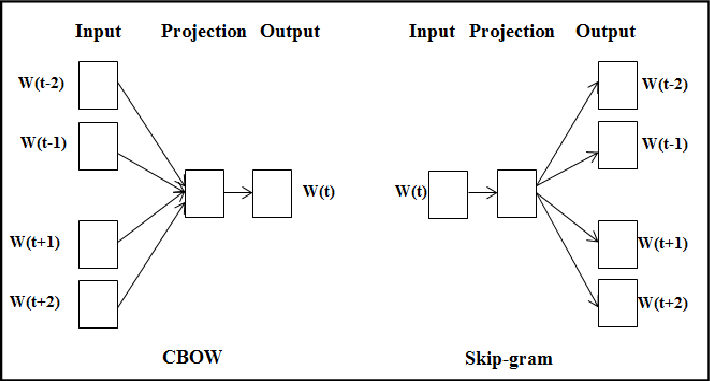

In [30]:
model_words = Word2Vec(sentences=d_1["words"], window = 2, min_count=0,iter=100, sg=1)
model_ig = Word2Vec(sentences=d_1["ig"], window = 2, min_count=0,iter=100, sg=1)
model_only = Word2Vec(sentences=d_1["only"], window = 2, min_count=0,iter=100, sg=1)
model_Noun = Word2Vec(sentences=d_1["Noun"], window = 2, min_count=0,iter=100, sg=1)

In [51]:
model_adj = Word2Vec(sentences=d_1["Adjective"], window = 2, min_count=0,iter=100, sg=1)

In [55]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)

In [31]:
model_words.wv.most_similar("피부")

[('얼굴', 0.603996217250824),
 ('가꿔주고', 0.5901963710784912),
 ('맞춰주니까', 0.5839099287986755),
 ('갖고있어', 0.5771357417106628),
 ('결', 0.573986828327179),
 ('최대로', 0.5739254951477051),
 ('근본', 0.5734596848487854),
 ('약하거나', 0.5692672729492188),
 ('화하여', 0.5647085905075073),
 ('민감하거나', 0.5644688606262207)]

In [32]:
model_ig.wv.most_similar("피부")

[('가꿔주고', 0.6246358752250671),
 ('맞춰주니까', 0.6044901609420776),
 ('최대로', 0.5999289155006409),
 ('심하시고', 0.5953666567802429),
 ('화하여', 0.591317892074585),
 ('나다', 0.5880407094955444),
 ('가졌거나', 0.5839011073112488),
 ('없으신', 0.5836567282676697),
 ('민감하거나', 0.5806781649589539),
 ('맞춰주고', 0.5789512991905212)]

In [33]:
model_only.wv.most_similar("피부")

[('아토피', 0.6202567219734192),
 ('약하거나', 0.597516655921936),
 ('초초초', 0.5894704461097717),
 ('맞춰주니까', 0.5858874917030334),
 ('민감한', 0.583871066570282),
 ('시켜주더라고요', 0.5770889520645142),
 ('잡아주어', 0.5761515498161316),
 ('화하여', 0.5734763145446777),
 ('돌아가면', 0.5727090239524841),
 ('나면잘', 0.5700066089630127)]

In [34]:
model_Noun.wv.most_similar("피부")

[('자극', 0.7446392774581909),
 ('세안', 0.6852647066116333),
 ('딥클렌징할', 0.628443717956543),
 ('조성', 0.6261141896247864),
 ('폼플렌징', 0.6236158609390259),
 ('민쁘언', 0.6209233403205872),
 ('사용', 0.6155017018318176),
 ('유수', 0.6153589487075806),
 ('고순', 0.6101464629173279),
 ('붕괴', 0.6068366765975952)]

In [56]:
model_nadj.wv.most_similar("피부")

[('자극', 0.6591176986694336),
 ('푸석푸석하니', 0.6451876163482666),
 ('화하여', 0.6152193546295166),
 ('예민한', 0.6057257056236267),
 ('약하거나', 0.6033207774162292),
 ('심하시고', 0.5925255417823792),
 ('민쁘언', 0.5892556309700012),
 ('아니신', 0.5876362919807434),
 ('알맞고', 0.586703896522522),
 ('착하기', 0.5862330198287964)]

# Topic Modeling

In [ ]:
documents = d_1["words"]

In [101]:
def topic_moding(k,documents):
    K=k
    random.seed(0)
    D = len(documents)
    def p_topic_given_document(topic, d, alpha=0.1):
        return ((document_topic_counts[d][topic] + alpha) /(document_lengths[d] + K * alpha))

    def p_word_given_topic(word, topic, beta=0.1):
        return ((topic_word_counts[topic][word] + beta) /(topic_counts[topic] + V * beta))

    def topic_weight(d, word, k):
        return p_word_given_topic(word, k) * p_topic_given_document(k, d)

    def choose_new_topic(d, word):
        return sample_from([topic_weight(d, word, k) for k in range(K)])

    def sample_from(weights):
        total = sum(weights)
        rnd = total * random.random()
        for i, w in enumerate(weights):
            rnd -= w
            if rnd <= 0:
                return i

    document_topics = [[random.randrange(K) for word in document] for document in documents]
    document_topic_counts = [Counter() for _ in documents]
    topic_word_counts = [Counter() for _ in range(K)]
    topic_counts = [0 for _ in range(K)]
    document_lengths = list(map(len, documents))
    distinct_words = set(word for document in documents for word in document)
    V = len(distinct_words)

    D = len(documents)
    for d in range(D):
        for word, topic in zip(documents[d], document_topics[d]):
            document_topic_counts[d][topic] += 1
            topic_word_counts[topic][word] += 1
            topic_counts[topic] += 1


    for d in range(D):
        for word, topic in zip(documents[d], document_topics[d]):
            document_topic_counts[d][topic] += 1
            topic_word_counts[topic][word] += 1
            topic_counts[topic] += 1
    return document_topic_counts, topic_word_counts

In [41]:
# docu_ = 문서당() K 개의 topic 중 가장 비슷한 점수
# topic_words = 해당 topic 을 대표하는 단어들
docu_,topic_words = topic_moding(5,d_1["words"])

In [42]:
len(topic_words)

5

In [45]:
docu_,topic_words = topic_moding(5,d_1["words"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4304), ('이', 3634), ('을', 3096), ('.', 3088)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4304), ('이', 3634), ('을', 3096), ('.', 3088)]
[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4398), ('이', 3560), ('을', 3144), ('.', 2866)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4398), ('이', 3560), ('을', 3144), ('.', 2866)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 3110)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 3110)]
[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4398), ('이', 3560), ('을', 3144), ('.', 2866)]
[(',', 4416), ('이', 3708), ('을', 3036), ('.', 2950)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4418), ('이', 3596), ('을', 3098), ('.', 3042)]
[(',', 4304), ('이', 3634), ('을', 3096), ('.', 3088)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 3110)]
[(',', 4496), ('이', 3570), ('.', 3130), ('을', 

In [46]:
docu_,topic_words = topic_moding(5,d_1["ig"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

None
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3482), ('을', 3124), ('에', 2760), ('피부', 2034)]
None
[('이', 3554), ('을', 3186), ('에', 2878), ('피부', 2106)]
[('이', 3482), ('을', 3124), ('에', 2760), ('피부', 2034)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3554), ('을', 3186), ('에', 2878), ('피부', 2106)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
None
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3444), ('을', 3052), ('에', 2808), ('피부', 2120)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3554), ('을', 3186), ('에', 2878), ('피부', 2106)]
[('이', 3582), ('을', 3080), ('에', 2662), ('피부', 1996)]
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
None
[('이', 3544), ('을', 3042), ('에', 2742), ('피부', 2160)]
[('이', 3

In [47]:
docu_,topic_words = topic_moding(5,d_1["only"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

None
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2052), ('사용', 1562), ('클렌징', 1390), ('제품', 1370)]
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
None
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2052), ('사용', 1562), ('클렌징', 1390), ('제품', 1370)]
[('피부', 2108), ('사용', 1530), ('클렌징', 1434), ('제품', 1386)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2114), ('사용', 1526), ('클렌징', 1460), ('제품', 1384)]
None
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2108), ('사용', 1530), ('클렌징', 1434), ('제품', 1386)]
[('피부', 2108), ('사용', 1530), ('클렌징', 1434), ('제품', 1386)]
[('피부', 2070), ('사용', 1538), ('클렌징', 1412), ('제품', 1396)]
[('피부', 2072), ('사용', 1552), ('클렌징', 1352), ('제품', 1320)]
[('피부', 2114), ('사용', 1526), ('클렌징', 1460), ('제품', 1384)]

In [48]:
docu_,topic_words = topic_moding(5,d_1["Noun"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

None
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
[('피부', 2048), ('사용', 1526), ('제품', 1328), ('클렌징', 1318)]
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
None
[('피부', 2048), ('사용', 1526), ('제품', 1328), ('클렌징', 1318)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 1996), ('사용', 1598), ('클렌징', 1404), ('제품', 1370)]
[('피부', 2144), ('사용', 1564), ('클렌징', 1442), ('제품', 1410)]
[('피부', 2048), ('사용', 1526), ('제품', 1328), ('클렌징', 1318)]
None
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 1996), ('사용', 1598), ('클렌징', 1404), ('제품', 1370)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]
[('피부', 2154), ('사용', 1590), ('클렌징', 1452), ('제품', 1272)]
[('피부', 1996), ('사용', 1598), ('클렌징', 1404), ('제품', 1370)]
[('피부', 2074), ('제품', 1476), ('클렌징', 1432), ('사용', 1428)]

In [ ]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

In [115]:
for i in topic_words:
    print(i.most_common(10))

[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932), ('선', 820), ('자외선', 752), ('차단', 658), ('수', 602), ('것', 530), ('성분', 464)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960), ('선', 906), ('자외선', 772), ('차단', 646), ('수', 590), ('것', 496), ('성분', 454)]
[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966), ('선', 884), ('자외선', 714), ('차단', 650), ('수', 512), ('것', 436), ('성분', 430)]
[('피부', 1686), ('선크림', 1382), ('사용', 1004), ('제품', 968), ('선', 768), ('자외선', 692), ('차단', 644), ('수', 552), ('것', 504), ('케어', 444)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000), ('선', 828), ('자외선', 720), ('차단', 690), ('수', 574), ('것', 462), ('성분', 410)]


# 다른 파일적용

### 맨 케어_네이버

In [94]:
f_1 = file_naver[1]
f_1

'02 맨 케어_네이버.xlsx'

In [95]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:14<00:00,  1.21it/s]


In [96]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

In [97]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('피부', 1113),
 ('제품', 1043),
 ('올인원', 798),
 ('사용', 738),
 ('수', 533),
 ('케어', 529),
 ('것', 521),
 ('남자', 474),
 ('남성', 470),
 ('에센스', 449),
 ('스킨', 432),
 ('입니다', 393),
 ('로션', 393),
 ('포맨', 368),
 ('크림', 355),
 ('처', 348),
 ('화장품', 317),
 ('수분', 304),
 ('선물', 295),
 ('기획', 294),
 ('추천', 293),
 ('있는', 289),
 ('성분', 275),
 ('저', 259),
 ('세트', 250),
 ('중고', 244),
 ('할인', 238),
 ('브랜드', 232),
 ('후', 229),
 ('이스', 227)]

In [98]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('입니다', 393),
 ('있는', 289),
 ('같아요', 141),
 ('좋은', 124),
 ('같은', 110),
 ('예쁜', 93),
 ('있습니다', 87),
 ('산뜻한', 86),
 ('있어서', 79),
 ('있어요', 75),
 ('없는', 67),
 ('많은', 64),
 ('안녕하세요', 62),
 ('좋을', 59),
 ('확실히', 59),
 ('촉촉한', 54),
 ('있어', 54),
 ('아니라', 51),
 ('가볍게', 45),
 ('빠르게', 45),
 ('이런', 44),
 ('민감한', 44),
 ('있고', 43),
 ('가벼운', 43),
 ('산뜻하게', 42),
 ('다양한', 42),
 ('더마', 42),
 ('있을', 40),
 ('간편하게', 40),
 ('같습니다', 39)]

In [99]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)

In [100]:
model_nadj.wv.most_similar("피부")

[('환해지면서', 0.5497651696205139),
 ('맑고', 0.5462175607681274),
 ('매끄러워졌어요', 0.538006603717804),
 ('울긋불긋했던', 0.534294843673706),
 ('칙칙한', 0.532278299331665),
 ('부드러워지고', 0.5291869640350342),
 ('이하나', 0.5274059772491455),
 ('강화하고', 0.5268946886062622),
 ('밸런스', 0.522408664226532),
 ('울긋불긋하고', 0.5205345153808594)]

In [101]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

None
[('피부', 494), ('제품', 438), ('올인원', 340), ('사용', 308)]
[('피부', 494), ('제품', 438), ('올인원', 340), ('사용', 308)]
[('피부', 412), ('제품', 404), ('사용', 328), ('올인원', 326)]
[('피부', 412), ('제품', 404), ('사용', 328), ('올인원', 326)]
None
[('피부', 454), ('제품', 396), ('올인원', 302), ('사용', 278)]
[('피부', 450), ('제품', 418), ('올인원', 304), ('사용', 294)]
[('피부', 412), ('제품', 404), ('사용', 328), ('올인원', 326)]
[('피부', 454), ('제품', 396), ('올인원', 302), ('사용', 278)]
[('피부', 494), ('제품', 438), ('올인원', 340), ('사용', 308)]
None
[('제품', 430), ('피부', 416), ('올인원', 324), ('사용', 268)]
None
[('피부', 412), ('제품', 404), ('사용', 328), ('올인원', 326)]
[('피부', 454), ('제품', 396), ('올인원', 302), ('사용', 278)]
[('피부', 494), ('제품', 438), ('올인원', 340), ('사용', 308)]
[('피부', 454), ('제품', 396), ('올인원', 302), ('사용', 278)]


### 컬러 메이크업_네이버

In [102]:
f_1 = file_naver[2]
f_1

'03 컬러 메이크업_네이버.xlsx'

In [103]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:32<00:00,  1.08s/it]


In [104]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

In [105]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('컬러', 3589),
 ('팔레트', 1868),
 ('메이크업', 1791),
 ('섀도우', 1506),
 ('글리터', 1344),
 ('더', 1090),
 ('사용', 1068),
 ('수', 1029),
 ('아이', 978),
 ('것', 934),
 ('제품', 909),
 ('눈', 839),
 ('핑크', 820),
 ('느낌', 813),
 ('아이섀도우', 797),
 ('가지', 771),
 ('펄', 763),
 ('발색', 744),
 ('저', 743),
 ('브라운', 739),
 ('있는', 633),
 ('베이스', 602),
 ('색상', 602),
 ('제', 581),
 ('때', 553),
 ('음영', 538),
 ('진짜', 527),
 ('매트', 508),
 ('데', 495),
 ('이', 475)]

In [106]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('있는', 633),
 ('입니다', 392),
 ('같아요', 361),
 ('좋은', 356),
 ('있어요', 306),
 ('예쁜', 270),
 ('있어서', 254),
 ('같은', 223),
 ('안녕하세요', 186),
 ('다양한', 166),
 ('그럼', 144),
 ('없는', 143),
 ('부드럽게', 142),
 ('부드러운', 117),
 ('이런', 113),
 ('있고', 111),
 ('좋고', 106),
 ('굉장히', 101),
 ('좋을', 100),
 ('아니라', 99),
 ('은은한', 98),
 ('화려한', 97),
 ('좋아하는', 96),
 ('좋아요', 94),
 ('미', 92),
 ('있어', 89),
 ('많은', 89),
 ('어떤', 83),
 ('진한', 82),
 ('예뻐서', 79)]

In [107]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)

In [108]:
model_nadj.wv.most_similar("컬러")

[('색상', 0.6995804309844971),
 ('섀도우', 0.619647204875946),
 ('쉐이드', 0.5968770980834961),
 ('뉴트럴톤', 0.5967316627502441),
 ('쉬머팔', 0.5960114598274231),
 ('가지', 0.5905885100364685),
 ('있어가을과', 0.5830318927764893),
 ('스텍트', 0.5799732804298401),
 ('칩', 0.5781670808792114),
 ('깨춤', 0.5767979621887207)]

홋수고요웜톤

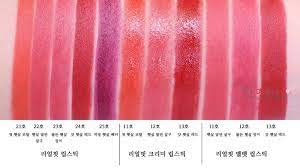

In [109]:
model_nadj.wv.most_similar("피부")

[('화사해지면서', 0.6627851128578186),
 ('륭', 0.6551436185836792),
 ('화사해졌다는', 0.6214420795440674),
 ('자연스러워서', 0.6141604781150818),
 ('개정', 0.6134744882583618),
 ('텁텁해', 0.5999757647514343),
 ('아닌데다', 0.5997189283370972),
 ('훌', 0.5997099876403809),
 ('흡사해서', 0.5939756035804749),
 ('윗쫌', 0.5920915603637695)]

In [110]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[('컬러', 1428), ('메이크업', 744), ('팔레트', 692), ('글리터', 576)]
[('컬러', 1458), ('메이크업', 726), ('팔레트', 706), ('섀도우', 600)]
[('컬러', 1386), ('팔레트', 762), ('메이크업', 718), ('섀도우', 608)]
[('컬러', 1428), ('메이크업', 744), ('팔레트', 692), ('글리터', 576)]
[('컬러', 1386), ('팔레트', 762), ('메이크업', 718), ('섀도우', 608)]
[('컬러', 1458), ('메이크업', 726), ('팔레트', 706), ('섀도우', 600)]
[('컬러', 1386), ('팔레트', 762), ('메이크업', 718), ('섀도우', 608)]
None
[('컬러', 1386), ('팔레트', 762), ('메이크업', 718), ('섀도우', 608)]
[('컬러', 1428), ('메이크업', 744), ('팔레트', 692), ('글리터', 576)]
[('컬러', 1386), ('팔레트', 762), ('메이크업', 718), ('섀도우', 608)]
[('컬러', 1436), ('팔레트', 768), ('메이크업', 706), ('섀도우', 630)]
[('컬러', 1436), ('팔레트', 768), ('메이크업', 706), ('섀도우', 630)]
[('컬러', 1470), ('팔레트', 808), ('메이크업', 688), ('섀도우', 600)]
[('컬러', 1458), ('메이크업', 726), ('팔레트', 706), ('섀도우', 600)]
[('컬러', 1428), ('메이크업', 744), ('팔레트', 692), ('글리터', 576)]
[('컬러', 1436), ('팔레트', 768), ('메이크업', 706), ('섀도우', 630)]
[('컬러', 1436), ('팔레트', 768), ('메이크업', 706), ('섀도우', 630)]
None
[('컬

- 확실히 상품마다. dic은 다르게 해야한다.
- 감성 단어가 제품에 대한 것인지 아니면, 그전의 상황에 대한 이야기 인지 구분 필요하다
    
    
    ex) 제품을 쓰기전에 피부가 별로 였지만, 그 이후에는 촉촉해 졌다.
    
- 피부와 같은 뺄수는 없지만, 분석에 정확도를 떨어뜨리는 것은 어떻게 해야하는가?


- 정보이론 + 중요단어 ( TF/ IDF) 관련해서 어떻게?

### 베이스 메이크업_네이버

In [111]:
f_1 = file_naver[3]
f_1

'04 베이스 메이크업_네이버.xlsx'

In [112]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:15<00:00,  1.21s/it]


In [113]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

In [114]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('피부', 1819),
 ('사용', 957),
 ('제품', 938),
 ('프라이머', 862),
 ('크림', 837),
 ('메이크업', 764),
 ('베이스', 641),
 ('수', 540),
 ('저', 504),
 ('톤업', 494),
 ('컬러', 471),
 ('것', 469),
 ('더', 440),
 ('커버', 431),
 ('파운데이션', 417),
 ('때', 395),
 ('톤', 372),
 ('느낌', 368),
 ('쿠션', 360),
 ('제', 328),
 ('수분', 316),
 ('모공', 315),
 ('광채', 277),
 ('표현', 274),
 ('있는', 260),
 ('화장', 239),
 ('글', 238),
 ('발라', 233),
 ('입니다', 228),
 ('이', 227)]

In [115]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('있는', 260),
 ('입니다', 228),
 ('같아요', 203),
 ('있어요', 172),
 ('좋은', 172),
 ('촉촉한', 129),
 ('있어서', 127),
 ('자연스러운', 124),
 ('같은', 122),
 ('가볍게', 101),
 ('없는', 97),
 ('굉장히', 80),
 ('미', 77),
 ('많은', 75),
 ('촉촉하게', 75),
 ('안녕하세요', 74),
 ('좋아요', 74),
 ('부드럽게', 70),
 ('확실히', 68),
 ('아니라', 67),
 ('얇게', 63),
 ('좋을', 60),
 ('매끈한', 60),
 ('그럼', 58),
 ('매끈하게', 55),
 ('있고', 50),
 ('화사한', 50),
 ('촉촉하고', 50),
 ('이런', 49),
 ('있어', 49)]

In [116]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)

In [117]:
model_nadj.wv.most_similar("피부")

[('균일하고', 0.5593125820159912),
 ('보송하지만', 0.5482233762741089),
 ('촉촉함으로', 0.5444591641426086),
 ('표현', 0.5398059487342834),
 ('발전', 0.5367045402526855),
 ('덜하고', 0.5340120792388916),
 ('가능하다니', 0.5284626483917236),
 ('고급스러우면서도', 0.5222910642623901),
 ('통과', 0.5210079550743103),
 ('차분하게', 0.5204596519470215)]

In [118]:
model_nadj.wv.most_similar("사용")

[('쓰기', 0.5421417951583862),
 ('위아래', 0.4675717055797577),
 ('고하더라', 0.45916494727134705),
 ('미니어쳐', 0.45443302392959595),
 ('알맞은', 0.447478711605072),
 ('풀메', 0.44643649458885193),
 ('번거로운', 0.44615307450294495),
 ('뷰러', 0.44552287459373474),
 ('편하다는아주', 0.4452601969242096),
 ('매치', 0.4429929852485657)]

In [119]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[('피부', 688), ('사용', 400), ('제품', 376), ('메이크업', 330)]
[('피부', 688), ('사용', 400), ('제품', 376), ('메이크업', 330)]
[('피부', 740), ('제품', 388), ('사용', 380), ('프라이머', 356)]
[('피부', 688), ('사용', 400), ('제품', 376), ('메이크업', 330)]
[('피부', 740), ('제품', 388), ('사용', 380), ('프라이머', 356)]
[('피부', 704), ('제품', 376), ('사용', 366), ('크림', 320)]
[('피부', 740), ('제품', 388), ('사용', 380), ('프라이머', 356)]
[('피부', 704), ('제품', 376), ('사용', 366), ('크림', 320)]
[('피부', 736), ('프라이머', 388), ('사용', 372), ('크림', 354)]
[('피부', 770), ('제품', 408), ('사용', 396), ('프라이머', 342)]
[('피부', 740), ('제품', 388), ('사용', 380), ('프라이머', 356)]
[('피부', 688), ('사용', 400), ('제품', 376), ('메이크업', 330)]
[('피부', 736), ('프라이머', 388), ('사용', 372), ('크림', 354)]


### 프래그런스_네이버

In [84]:
f_1 = file_naver[4]
f_1

'05 프래그런스_네이버.xlsx'

프래그런스

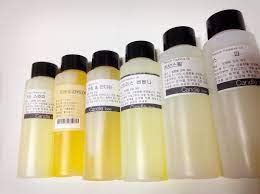

In [85]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [00:40<00:00,  1.35it/s]


In [86]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

In [87]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('향', 6665),
 ('향수', 5750),
 ('느낌', 1467),
 ('것', 1464),
 ('퍼퓸', 1364),
 ('수', 1273),
 ('사용', 1164),
 ('로', 1043),
 ('제품', 1033),
 ('드', 1027),
 ('향기', 980),
 ('더', 875),
 ('저', 859),
 ('있는', 857),
 ('노트', 824),
 ('제', 800),
 ('때', 799),
 ('입니다', 766),
 ('구매', 765),
 ('머스크', 758),
 ('추천', 753),
 ('오', 738),
 ('이', 726),
 ('선물', 690),
 ('로럴', 653),
 ('장미', 591),
 ('정말', 590),
 ('생각', 575),
 ('나', 575),
 ('가지', 567)]

In [93]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('있는', 857),
 ('입니다', 766),
 ('좋은', 545),
 ('같아요', 521),
 ('같은', 468),
 ('있어요', 300),
 ('은은한', 255),
 ('좋아하는', 248),
 ('많은', 226),
 ('있다', 214),
 ('미', 205),
 ('그런', 198),
 ('없는', 198),
 ('있어서', 198),
 ('이런', 183),
 ('안녕하세요', 182),
 ('다양한', 176),
 ('좋을', 169),
 ('굉장히', 163),
 ('새로운', 162),
 ('있는데', 161),
 ('아니라', 151),
 ('같다', 142),
 ('은은하게', 142),
 ('좋아요', 141),
 ('있습니다', 134),
 ('부드러운', 129),
 ('어떤', 128),
 ('있고', 118),
 ('새롭게', 112)]

In [88]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)

In [89]:
model_nadj.wv.most_similar("피부")

[('진정', 0.6243636608123779),
 ('듈', 0.6208340525627136),
 ('밤사이', 0.5913659334182739),
 ('야한다구요', 0.5841022729873657),
 ('카렌', 0.5755012631416321),
 ('건조해지지', 0.5727373361587524),
 ('건조함으로', 0.5718162059783936),
 ('머릿', 0.5658522844314575),
 ('말라가', 0.5609537959098816),
 ('건조해지거나', 0.5593926906585693)]

In [92]:
model_nadj.wv.most_similar("향")

[('향기', 0.702941358089447),
 ('향수', 0.6432210206985474),
 ('변하니까', 0.6150549650192261),
 ('신기한건', 0.6103280782699585),
 ('느낌', 0.603627622127533),
 ('그렇진', 0.5924903750419617),
 ('담콤함', 0.5920340418815613),
 ('무겁나', 0.5867022275924683),
 ('청순하면서', 0.5828011631965637),
 ('올드', 0.5827817320823669)]

In [91]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[('향', 2634), ('향수', 2304), ('느낌', 634), ('퍼퓸', 600)]
[('향', 2676), ('향수', 2322), ('느낌', 636), ('것', 614)]
[('향', 2820), ('향수', 2322), ('것', 596), ('퍼퓸', 552)]
[('향', 2634), ('향수', 2304), ('느낌', 634), ('퍼퓸', 600)]
[('향', 2676), ('향수', 2322), ('느낌', 636), ('것', 614)]
[('향', 2628), ('향수', 2302), ('느낌', 576), ('수', 556)]
[('향', 2628), ('향수', 2302), ('느낌', 576), ('수', 556)]
[('향', 2820), ('향수', 2322), ('것', 596), ('퍼퓸', 552)]
[('향', 2634), ('향수', 2304), ('느낌', 634), ('퍼퓸', 600)]
[('향', 2676), ('향수', 2322), ('느낌', 636), ('것', 614)]
[('향', 2820), ('향수', 2322), ('것', 596), ('퍼퓸', 552)]
[('향', 2628), ('향수', 2302), ('느낌', 576), ('수', 556)]
[('향', 2676), ('향수', 2322), ('느낌', 636), ('것', 614)]
[('향', 2676), ('향수', 2322), ('느낌', 636), ('것', 614)]
[('향', 2572), ('향수', 2250), ('것', 582), ('느낌', 564)]
[('향', 2628), ('향수', 2302), ('느낌', 576), ('수', 556)]
[('향', 2628), ('향수', 2302), ('느낌', 576), ('수', 556)]
[('향', 2628), ('향수', 2302), ('느낌', 576), ('수', 556)]
[('향', 2676), ('향수', 2322), ('느낌', 636), ('

### 스타일러_네이버

In [121]:
f_1 = file_naver[5]
f_1

'06 스타일러_네이버.xlsx'

In [122]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.95it/s]


In [123]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

In [124]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('피부', 206),
 ('사용', 174),
 ('케어', 148),
 ('수', 142),
 ('제품', 124),
 ('드라이기', 122),
 ('모발', 116),
 ('헤어', 106),
 ('것', 94),
 ('때', 94),
 ('더마', 92),
 ('있는', 86),
 ('스타', 80),
 ('소닉', 80),
 ('비달사순', 78),
 ('얼굴', 75),
 ('더', 70),
 ('저', 66),
 ('수분', 66),
 ('가지', 64),
 ('리', 63),
 ('이', 61),
 ('아티스트', 60),
 ('정말', 58),
 ('머리', 56),
 ('마스크', 55),
 ('아이', 55),
 ('일링', 54),
 ('기능', 52),
 ('센스', 52)]

In [125]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('더마', 92),
 ('있는', 86),
 ('입니다', 43),
 ('있어요', 41),
 ('건강한', 25),
 ('좋은', 24),
 ('빠르게', 23),
 ('강력한', 23),
 ('있어', 22),
 ('있어서', 20),
 ('같은', 20),
 ('고데기', 18),
 ('아니라', 16),
 ('있는데', 15),
 ('굵은', 15),
 ('있는데요', 14),
 ('그럼', 13),
 ('있으니', 13),
 ('같아요', 12),
 ('있게', 12),
 ('고데', 12),
 ('이런', 11),
 ('원하는', 11),
 ('있답니다', 10),
 ('다양한', 10),
 ('차분하게', 10),
 ('고데기로', 10),
 ('빠른', 10),
 ('어떤', 9),
 ('안녕하세요', 9)]

In [126]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)

In [127]:
model_nadj.wv.most_similar("피부")

[('화해', 0.5019940137863159),
 ('리듬', 0.49492114782333374),
 ('건조하고', 0.48291945457458496),
 ('요소', 0.47026902437210083),
 ('매끈하고', 0.46714580059051514),
 ('활', 0.46570226550102234),
 ('투명한', 0.46555963158607483),
 ('유효', 0.46424129605293274),
 ('콜', 0.46358656883239746),
 ('전용', 0.4633151888847351)]

In [130]:
model_nadj.wv.most_similar("케어")

[('첨단', 0.5339672565460205),
 ('가벼워', 0.5313385128974915),
 ('푸른빛', 0.5125375986099243),
 ('딱이에요', 0.5121709704399109),
 ('피팅', 0.5061284899711609),
 ('끈', 0.5018102526664734),
 ('홈', 0.5012735724449158),
 ('선사', 0.4971429705619812),
 ('스킨', 0.49312180280685425),
 ('적합한', 0.49280133843421936)]

In [129]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[('피부', 98), ('사용', 70), ('케어', 58), ('수', 58)]
None
[('피부', 70), ('사용', 68), ('케어', 64), ('수', 58)]
[('피부', 78), ('케어', 72), ('사용', 70), ('드라이기', 66)]
[('피부', 98), ('사용', 70), ('케어', 58), ('수', 58)]
[('피부', 74), ('사용', 72), ('케어', 68), ('수', 64)]


### 이너 뷰티_네이버

In [132]:
f_1 = file_naver[6]
f_1

'07 이너 뷰티_네이버.xlsx'

In [133]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.01s/it]


In [134]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

In [135]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('다이어트', 590),
 ('글램', 523),
 ('수', 488),
 ('디', 451),
 ('제품', 435),
 ('섭취', 386),
 ('뮤신', 365),
 ('것', 344),
 ('저', 283),
 ('뷰티', 278),
 ('도움', 269),
 ('제', 246),
 ('때', 242),
 ('피부', 240),
 ('있는', 237),
 ('관리', 227),
 ('더', 220),
 ('체지방', 220),
 ('운동', 216),
 ('물', 184),
 ('유나', 169),
 ('그린', 159),
 ('메타', 156),
 ('분', 153),
 ('추출', 153),
 ('보조', 152),
 ('주', 149),
 ('맛', 148),
 ('포', 141),
 ('있어요', 141)]

In [136]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('있는', 237),
 ('있어요', 141),
 ('같아요', 120),
 ('좋은', 118),
 ('입니다', 100),
 ('있어서', 90),
 ('건강한', 86),
 ('꾸준히', 82),
 ('많은', 50),
 ('아니라', 50),
 ('같은', 47),
 ('이런', 43),
 ('간편하게', 42),
 ('건강하게', 42),
 ('있는데', 42),
 ('있어', 41),
 ('좋아요', 41),
 ('있다고', 39),
 ('있는데요', 36),
 ('없는', 36),
 ('안녕하세요', 36),
 ('있답니다', 32),
 ('아닌', 30),
 ('있으니', 30),
 ('확실히', 29),
 ('다양한', 29),
 ('좋을', 28),
 ('있을', 26),
 ('있도록', 26),
 ('가벼운', 26)]

In [137]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)

In [141]:
model_nadj.wv.most_similar("다이어트")

[('보조', 0.5576021671295166),
 ('시려면', 0.5301137566566467),
 ('성공하고', 0.5137969851493835),
 ('아캄', 0.5083569884300232),
 ('동거', 0.5018340945243835),
 ('베케', 0.5017796158790588),
 ('운명', 0.4986282289028168),
 ('똑같아요', 0.4974571764469147),
 ('안되면', 0.48673173785209656),
 ('많으실텐데요', 0.4856056869029999)]

In [143]:
model_nadj.wv.most_similar("제품")

[('있을만큼', 0.43546372652053833),
 ('까다로워', 0.4264450669288635),
 ('똑똑하게', 0.4068659245967865),
 ('특화된', 0.4055328667163849),
 ('릴', 0.4031006693840027),
 ('인기', 0.3996966779232025),
 ('클라우드', 0.3970223069190979),
 ('지슬', 0.39447489380836487),
 ('은지', 0.3935612440109253),
 ('젊은이', 0.3930920958518982)]

In [142]:
model_nadj.wv.most_similar("글램")

[('디', 0.8820701241493225),
 ('리즈', 0.6276969909667969),
 ('주', 0.6168026328086853),
 ('글랜디', 0.6099140048027039),
 ('디시', 0.5742799043655396),
 ('아닙니당', 0.5719228982925415),
 ('그램디', 0.5651630759239197),
 ('책자', 0.5620611310005188),
 ('호호', 0.5599531531333923),
 ('자사', 0.5561160445213318)]

In [140]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[('다이어트', 250), ('글램', 236), ('수', 216), ('제품', 188)]
[('다이어트', 274), ('디', 194), ('수', 190), ('섭취', 186)]
[('글램', 246), ('다이어트', 228), ('디', 196), ('제품', 182)]
[('다이어트', 274), ('디', 194), ('수', 190), ('섭취', 186)]
[('수', 214), ('다이어트', 210), ('글램', 192), ('제품', 182)]
[('다이어트', 250), ('글램', 236), ('수', 216), ('제품', 188)]
[('다이어트', 250), ('글램', 236), ('수', 216), ('제품', 188)]
[('글램', 246), ('다이어트', 228), ('디', 196), ('제품', 182)]


### 선 케어_네이버

In [9]:
f_1 = file_naver[7]
f_1

'08 선 케어_네이버.xlsx'

In [10]:
d_1 = pd.read_excel(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\{}".format(f_1))
pos = []
words = []
for i in tqdm(range(len(d_1))):
    p = twitter.pos(d_1["naver_blog_review"][i])
    word = [w[0] for w in p]
    pos.append(p)
    words.append(word)
d_1["tag"] = pos
d_1["words"] = words

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [01:32<00:00,  2.16s/it]


In [117]:
d_1["ig"] = ignore_(d_1,["Punctuation","Suffix"])
d_1["only"] = only_(d_1,["Noun","Verb","Adjective","Foreign","Adverb"])
d_1["Noun"] = only_(d_1,["Noun"])
d_1["Adjective"] = only_(d_1,["Adjective"])
d_1["N_adj"] = only_(d_1,["Noun","Adjective"])

NameError: name 'only' is not defined

In [118]:
d_1["Verb"] = only_(d_1,["Verb"])

In [97]:
Counter(d_1["words"].sum()).most_common(30)

[('이', 7327),
 ('.', 5985),
 ('에', 5680),
 ('을', 4933),
 (',', 4533),
 ('피부', 4190),
 ('선크림', 3355),
 ('!', 3206),
 ('가', 3178),
 ('은', 2899),
 ('도', 2695),
 ('를', 2668),
 ('제품', 2462),
 ('사용', 2432),
 ('으로', 2343),
 ('의', 2155),
 ('선', 2103),
 ('는', 1948),
 ('로', 1944),
 ('자외선', 1825),
 ('차단', 1644),
 ('한', 1544),
 ('수', 1525),
 ('제', 1467),
 ('들', 1335),
 ('자', 1328),
 ('것', 1214),
 ('~', 1158),
 ('과', 1101),
 ('성분', 1100)]

In [15]:
Counter(d_1["N_adj"].sum()).most_common(30)

[('피부', 4189),
 ('선크림', 3355),
 ('제품', 2462),
 ('사용', 2432),
 ('선', 2103),
 ('자외선', 1825),
 ('차단', 1644),
 ('수', 1415),
 ('것', 1214),
 ('성분', 1100),
 ('케어', 1000),
 ('때', 970),
 ('크림', 964),
 ('무기', 956),
 ('차', 926),
 ('톤업', 924),
 ('더', 912),
 ('메이크업', 812),
 ('제', 806),
 ('있는', 706),
 ('저', 695),
 ('닥터', 628),
 ('느낌', 625),
 ('발라', 608),
 ('탁', 601),
 ('입니다', 595),
 ('끈', 569),
 ('톤', 567),
 ('얼굴', 558),
 ('효과', 537)]

In [116]:
Counter(d_1["only"].sum()).most_common(30)

[('피부', 4190),
 ('선크림', 3355),
 ('제품', 2462),
 ('사용', 2432),
 ('선', 2103),
 ('자외선', 1825),
 ('차단', 1644),
 ('수', 1415),
 ('것', 1214),
 ('성분', 1100),
 ('케어', 1000),
 ('때', 971),
 ('할', 968),
 ('크림', 964),
 ('무기', 956),
 ('차', 928),
 ('톤업', 924),
 ('더', 915),
 ('메이크업', 812),
 ('제', 806),
 ('하는', 792),
 ('해', 788),
 ('있는', 706),
 ('잘', 698),
 ('저', 695),
 ('없이', 666),
 ('닥터', 628),
 ('느낌', 625),
 ('발라', 608),
 ('탁', 601)]

In [159]:
Counter(d_1["Verb"].sum()).most_common(100)

[('할', 968),
 ('하는', 792),
 ('잘', 698),
 ('되는', 470),
 ('해', 444),
 ('바르고', 391),
 ('하기', 389),
 ('되어', 365),
 ('된', 358),
 ('썬', 341),
 ('해서', 298),
 ('않고', 293),
 ('바른', 287),
 ('한', 286),
 ('하면', 262),
 ('합니다', 258),
 ('펴', 250),
 ('바르는', 243),
 ('바를', 241),
 ('보니', 222),
 ('하고', 215),
 ('올가', 209),
 ('해주는', 203),
 ('하게', 196),
 ('바르기', 185),
 ('바르면', 185),
 ('하지', 168),
 ('쓰고', 156),
 ('들거', 156),
 ('해보세요', 143),
 ('와', 142),
 ('않는', 138),
 ('받아', 131),
 ('써', 131),
 ('하여', 131),
 ('크', 130),
 ('되고', 128),
 ('보면', 128),
 ('올', 124),
 ('선세', 120),
 ('차는', 116),
 ('보여', 116),
 ('벤', 113),
 ('했는데', 112),
 ('쓸', 109),
 ('않은', 108),
 ('될', 107),
 ('않아서', 107),
 ('주는', 105),
 ('쉽게', 104),
 ('몰', 103),
 ('는', 102),
 ('해도', 100),
 ('하는데', 99),
 ('쓰는', 97),
 ('가', 97),
 ('한다', 97),
 ('발리는', 94),
 ('본', 93),
 ('오가', 93),
 ('바르', 91),
 ('됩니다', 91),
 ('했어요', 91),
 ('해야', 91),
 ('챙겨', 90),
 ('발랐을', 89),
 ('클', 88),
 ('들', 87),
 ('하면서', 87),
 ('되지', 84),
 ('뗄', 84),
 ('파데', 83),
 ('해요', 82),
 ('

In [16]:
Counter(d_1["Adjective"].sum()).most_common(30)

[('있는', 706),
 ('입니다', 595),
 ('좋은', 509),
 ('같아요', 445),
 ('있어요', 404),
 ('촉촉한', 299),
 ('없는', 291),
 ('있어서', 285),
 ('같은', 268),
 ('가벼운', 216),
 ('가볍게', 214),
 ('아니라', 213),
 ('좋아요', 213),
 ('없고', 207),
 ('부드럽게', 191),
 ('안녕하세요', 185),
 ('촉촉하게', 184),
 ('많은', 174),
 ('순한', 168),
 ('자연스러운', 162),
 ('강력한', 154),
 ('있다', 152),
 ('촉촉하고', 146),
 ('산뜻한', 145),
 ('있어', 139),
 ('있는데', 129),
 ('빠르게', 125),
 ('좋고', 121),
 ('없어서', 119),
 ('굉장히', 118)]

In [18]:
model_nadj = Word2Vec(sentences=d_1["N_adj"], window = 2, min_count=0,iter=100, sg=1)
model_only = Word2Vec(sentences=d_1["only"], window = 2, min_count=0,iter=100, sg=1)

In [120]:
model_Noun =  Word2Vec(sentences=d_1["Noun"], window = 2, min_count=0,iter=100, sg=1)

In [124]:
model_adj = Word2Vec(sentences=d_1["Adjective"], window = 2, min_count=0,iter=100, sg=1)

In [171]:
model_ig = Word2Vec(sentences=d_1["ig"], window = 5, min_count=0,iter=100, sg=1)

In [172]:
model_ig.wv.most_similar("피부",topn=50)

[('적합하며', 0.6468288898468018),
 ('이적', 0.6200810670852661),
 ('한답니다거기에', 0.6112609505653381),
 ('탄탄하고', 0.6106727719306946),
 ('억제시켜주고', 0.610052764415741),
 ('지쳐', 0.6086847186088562),
 ('를', 0.6051132678985596),
 ('받을수있는', 0.6046282649040222),
 ('불규칙한', 0.5980154871940613),
 ('좋아진다는', 0.5969635844230652),
 ('시켜주', 0.5955793857574463),
 ('밝힙니다', 0.5954379439353943),
 ('악한', 0.5944439768791199),
 ('발라졌습니다', 0.5941027402877808),
 ('쳐지지', 0.5923284888267517),
 ('내려놓게', 0.5900780558586121),
 ('야하죠', 0.5834134817123413),
 ('해보습', 0.5833998918533325),
 ('탁월하며', 0.5829268097877502),
 ('자극받기', 0.5824832320213318),
 ('시켜주어', 0.580840528011322),
 ('치밀해진', 0.5805408358573914),
 ('강인해', 0.578118622303009),
 ('시달리는', 0.5775624513626099),
 ('푸석한', 0.5774824619293213),
 ('않기에', 0.5751984715461731),
 ('#블랙커런트', 0.5738709568977356),
 ('막아주기', 0.5729519724845886),
 ('갖기', 0.5723963975906372),
 ('시키는데에', 0.5717247724533081),
 ('#국화추출물', 0.5708237886428833),
 ('맞춰줘서', 0.5703058242797852),
 ('ROSANIC', 0.

In [21]:
model_only.wv.most_similar("피부")

[('한답니다거기에', 0.5737124681472778),
 ('시켜주기', 0.5710243582725525),
 ('시술', 0.5585547685623169),
 ('탄탄하고', 0.5533682703971863),
 ('되었쥬', 0.5476675033569336),
 ('민감', 0.5453646183013916),
 ('지치고', 0.5408702492713928),
 ('편안하면서도', 0.5353967547416687),
 ('적합하며', 0.5329412817955017),
 ('살려', 0.5306206345558167)]

In [155]:
model_nadj.wv.most_similar("피부")

[('노랗고', 0.5959280729293823),
 ('예민하고', 0.5918735265731812),
 ('불규칙한', 0.5812904834747314),
 ('처벙', 0.5788267254829407),
 ('되었쥬', 0.5725646018981934),
 ('희야에게', 0.5619759559631348),
 ('소로', 0.5618264079093933),
 ('적합하다는', 0.5562130212783813),
 ('울긋불긋', 0.554952085018158),
 ('한층', 0.5545069575309753)]

In [159]:
model_only.wv.most_similar("피부")

[('지치고', 0.5595671534538269),
 ('탄탄하고', 0.5559035539627075),
 ('않기에', 0.5543166995048523),
 ('민감', 0.5493554472923279),
 ('한답니다거기에', 0.5432157516479492),
 ('맞춰주고', 0.5428077578544617),
 ('시켜주기', 0.5394154191017151),
 ('되었쥬', 0.539408802986145),
 ('노랗고', 0.5384190678596497),
 ('이적', 0.5384111404418945)]

- 전부제거가 아니라, 일정한 품사만 제거

In [152]:
model_nadj.wv.most_similar("제품")

[('선크림', 0.6647937297821045),
 ('한적', 0.5447033643722534),
 ('이용권', 0.5414275527000427),
 ('아이템', 0.5394691228866577),
 ('도딱', 0.5385655164718628),
 ('안누웅', 0.5364773273468018),
 ('선', 0.5364599227905273),
 ('은제', 0.534378707408905),
 ('라로슈포제로', 0.5307303071022034),
 ('수행', 0.5306285619735718)]

In [156]:
model_nadj.wv.most_similar("촉촉한")

[('촉촉하게', 0.5811530351638794),
 ('몽글몽글하게', 0.5408022403717041),
 ('같아서요', 0.534440815448761),
 ('시원하고', 0.5326324701309204),
 ('촉촉한것을', 0.531924307346344),
 ('답답하지도', 0.5274928212165833),
 ('시원하면서도', 0.5234758853912354),
 ('묵직하지', 0.5234411358833313),
 ('부드러운', 0.5229931473731995),
 ('푸석했던', 0.5204458236694336)]

In [161]:
model_only.wv.most_similar("촉촉한")

[('산뜻한', 0.6242720484733582),
 ('보송한', 0.571692705154419),
 ('촉촉하게', 0.5575750470161438),
 ('가졌더라구요', 0.5437642335891724),
 ('금고', 0.5390765070915222),
 ('이더라구요', 0.5350401997566223),
 ('묵직하지', 0.5310758352279663),
 ('쫀쫀하', 0.5253417491912842),
 ('당당히', 0.5213744044303894),
 ('새거라서', 0.5186647772789001)]

In [22]:
model_nadj.wv.most_similar("좋은")

[('좋았던', 0.5282868146896362),
 ('적합한거', 0.5226905941963196),
 ('딱인', 0.5219089984893799),
 ('적합한', 0.5042407512664795),
 ('같았는데요', 0.5030659437179565),
 ('적합할것', 0.5005510449409485),
 ('만족하실', 0.49950093030929565),
 ('선데', 0.4965992569923401),
 ('적당했던거', 0.49576428532600403),
 ('좋을', 0.4844459593296051)]

In [153]:
model_nadj.wv.most_similar("글램")

[('블렌드', 0.8450090885162354),
 ('씨앤티', 0.8334503769874573),
 ('마스터', 0.802195131778717),
 ('티앤쥐', 0.8001924157142639),
 ('드로즈', 0.7946767210960388),
 ('킷', 0.792953610420227),
 ('펜더', 0.7678996324539185),
 ('글리터', 0.7615689039230347),
 ('보브', 0.7596420645713806),
 ('브릭', 0.7526475191116333)]

In [154]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
None
None
[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932)]
None
[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932)]
[('피부', 1634), ('선크림

In [162]:
model_words.save(r"C:\Users\Samsung\Desktop\Project\이희정 교수님\project\data\word2vec\model_sample.model")
#model = Word2Vec.load("word2vec.model")

1. 일단 위의 형용사는 왜 형용사 끼리만 나오는지 예시보고 확인하기
    - 이를 통해서 직접적으로 Noun(part) 과 Adj(feature)를 직접적으로 연결하기 어려울 듯하다.

2. pca로 표현해 보기
3. context word 내뱉는 

### 왜 Adj 주변에 Adj인가? ( 해당 word 있는 sentence 끄집어 내기)

In [50]:
window_size = 10
target = "좋은"
extraction = []
for i in tqdm(d_1["naver_blog_review"]):
    sentences = i.split("  ")
    #print(sentences)
    #break
    for senten in sentences:
        if target in senten:
            index_ = senten.find(target)
            try:
                extraction.append(senten[index_-window_size:index_+window_size])
            except:
                pass
            #print(senten)
        #print("_"*40)

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1299.11it/s]


In [51]:
extraction[0]

'은휴대성이 굉장히 좋은 소용량!! 무'

In [52]:
extraction[1]

' 3. 덧바르기도 좋은 자외선 차단제'

In [53]:
extraction[2]

'리선크림 #덧바르기좋은 #백탁있는 #'

In [48]:
window_size = 10
target = "촉촉"
extraction = []
for i in tqdm(d_1["naver_blog_review"]):
    sentences = i.split("  ")
    #print(sentences)
    #break
    for senten in sentences:
        if target in senten:
            index_ = senten.find(target)
            try:
                extraction.append(senten[index_-window_size:index_+window_size])
            except:
                pass
            #print(senten)
        #print("_"*40)

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1412.25it/s]


In [49]:
extraction

['도로굉장히 가볍고 촉촉하게 발렸어요😍',
 '스킨핏 #화사한 #촉촉한 #순한 #수',
 '상 함유하여 아주 촉촉한 제형을 맛볼',
 '르고 난 직후.수분촉촉한 제형이라서 ',
 '가 되고 은은하게 촉촉함이 유지된다.',
 ' 함유된 텍스처가 촉촉하고 가볍게 밀',
 '낌, 유분감 없이 촉촉하고 가벼운 마',
 '으로 보기만 해도 촉촉함이 느껴지더라',
 '성이 엄청 좋아요,촉촉해서 무기자차 ',
 '. 수분크림 같은 촉촉한 사용감(수분',
 '드 유브이 더블컷 촉촉 톤업 선 플루',
 ' 완전 물제형으로 촉촉하나, 눈시림이',
 '되었다고 하네요! 촉촉한 발림성이지만',
 '찰 POINT1. 촉촉한 워터리 제형',
 '지 않고 부드럽고 촉촉한 발림성!3.',
 '이 매우 부드럽고 촉촉하여 선크림을 ',
 '확실히 화사해지고 촉촉해진 모습을 볼',
 '공이 크고 많으면 촉촉한 타입이기 때',
 ' 것을 추천한다! 촉촉하긴 하지만 건',
 '생각보다 부드럽고 촉촉한 느낌',
 '라고 적혀있을만큼 촉촉해요!약간 화사',
 '? 저같은 건성은 촉촉함에 늘 목말라',
 '백탁 현상도 없고 촉촉한 제형 덕분에',
 '게 잘 펴지는데용 촉촉한 보습력까지 ',
 '',
 '적이지 않으면서도 촉촉한 제품을 찾고',
 '짝 노란기가 돌아요촉촉하고 부드러워서',
 '춰주어 상쾌해요~ 촉촉하게 발리는데 ',
 '끈적임을 줄여주고 촉촉하게 케어해줄 ',
 '않았는데요.이번에 촉촉하고 산뜻하면서',
 '형이 정말 가볍고 촉촉해요! 빠르게 ',
 '문에해당 제품처럼 촉촉하고~ 밀림 없',
 '서 끈적이지 않고 촉촉한 상쾌한 자외',
 '는 데 도움을 주는촉촉한 키엘 쿨링 ',
 ' 처음 바를 때는 촉촉한 발림을 가지',
 '부에도 근적임 없이촉촉한 자외선 차단',
 '는데,끈적임 없이 촉촉한 사용감.30',
 '편은 아니고적당히 촉촉하면서 윤기있게',
 '전혀 없어서 그냥 촉촉한앰플을 바른 ',
 '지더라구요 ㅎㅎㅎ 촉촉함과 시원함이 ',
 '',
 '',
 '가능해서기름지거나 촉촉

In [94]:
window_size = 10
target = "피부"
extraction = []
for i in tqdm(d_1["naver_blog_review"]):
    sentences = i.split("  ")
    #print(sentences)
    #break
    for senten in sentences:
        if target in senten:
            index_ = senten.find(target)
            try:
                extraction.append(senten[index_-window_size:index_+window_size])
            except:
                pass
            #print(senten)
        #print("_"*40)

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1252.99it/s]


In [95]:
extraction

[' 논나노 제형이라 피부 흡수를 최소화',
 '채가 아주그냥!!!피부 속부터 올라온',
 '녁에 클렌징 할 때피부에 표면에 남은',
 '라야하니까기왕이면 피부 표현 예쁘게 ',
 '파운데이션을 넣어둘피부 표현(광채)이',
 '수분감있는 #트러블피부선크림 #민감피',
 ' 투루케어 라인은 피부 고민을 개선하',
 '사이즈의 입자들은 피부에 침투될 가능',
 '',
 ' 말하면 돌가루) 피부 밖에 막을 만',
 '포뮬라로 여드름성 피부에사용 가능한 ',
 '스러운 톤-업 효과피부 톤을 균일하게',
 '외선 차단 성분이 피부 위에 고루 도',
 '려 수분감을 주고 피부결 정리도 해주',
 '즈 성분을 사용해 피부 흡수가 덜하고',
 '던 제품이에요.또 피부자극없고, 무거',
 ' 무기자차 선크림은피부에 흡수되지 않',
 '루케어 라인이트러블피부를 위한 진정효',
 '수 있어요저는 지성피부인데도 건조하다',
 '',
 '국도 신경쓰이기도 피부 보정할 수 있',
 ' 먼저 테스트해보고피부에 맞지 않으면',
 '논나노 제품이라서 피부에 흡수되지 않',
 '간이 다소 지나면 피부에 착!하고 달',
 '',
 '',
 '어요ㅠ화장+마스크=피부 악재의 원인!',
 '험분을 사용해보고 피부에 맞지 않으면',
 ' 함유하고 연약한 피부에도 마일드하게',
 '너무 좋아보이',
 '',
 '림 5 (없음!!)피부트러블 5 (5',
 '기 전 화장실에서 피부색이 원상복귀)',
 '시림이 조금 있고 피부가 뻑뻑해지는 ',
 '부지에다가 민감성 피부인 저에게 맞는',
 '감 왕창! 민감성 피부때문에 무기자차',
 '제형으로 푸석했던 피부에서 수분 팡팡',
 '※장점1. 민감성 피부, 트러블 피부',
 '러운 톤업 효과, 피부에 잘 흡수되지',
 '단▶지성, 민감성 피부에 좋은 성분2',
 '성분이 적어 민감 피부에도 좀 더 순',
 ' 분말들이 우리의 피부에 흡수되어 모',
 ' 자연유래 성분이 피부를 진정과 보습',
 '어 라인은 민감성 피부를 소유한 사람',
 '루어져있기 때문에 피

In [98]:
window_size = 10
target = "산뜻"
extraction = []
for i in tqdm(d_1["naver_blog_review"]):
    sentences = i.split("  ")
    #print(sentences)
    #break
    for senten in sentences:
        if target in senten:
            index_ = senten.find(target)
            try:
                extraction.append(senten[index_-window_size:index_+window_size])
            except:
                pass
            #print(senten)
        #print("_"*40)

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1683.08it/s]


### 마무리감 = part

In [99]:
extraction

['#민감피부선크림 #산뜻한 #밀착력 #',
 '데 ㅜㅜ이건 정말 산뜻한 마무리감이 ',
 '안느껴지시죠?진짜 산뜻해서 마음에 쏙',
 '는 시즌엔 좀 더 산뜻한 게 확실히 ',
 ' 느낌이더라구요. 산뜻하게 펴 발리면',
 ' 보송한 마무리가 산뜻한 촉감을 가져',
 '나 끈적이지 않고 산뜻한 느낌이라 마',
 ' 꼭 챙겨바르는데요산뜻하고 쿨링감있는',
 '',
 '분에 끈적임 없이 산뜻한 여름을 보내',
 '의 느낄 수 없는 산뜻한 텍스처로바로',
 '.이번에 촉촉하고 산뜻하면서도 쿨링감',
 '다가 끈적임 없는 산뜻한 텍스처로 여',
 '부 온도 낮춰주며 산뜻한 텍스쳐의 쿨',
 '용하기에 좋았고요!산뜻한 텍스처라서 ',
 '리감이고요.후에는 산뜻하게 마무리가 ',
 '',
 '부드럽게 발리면서 산뜻한 마무리감을 ',
 '어요.잔여감 없이 산뜻, 보송하게 마',
 '',
 '지케어효과 그리고 산뜻, 보송한 마무',
 ' 번들거리다보니까 산뜻한 텍스쳐에 쿨',
 '여감이 남지 않는 산뜻한 마무리감을가',
 '거림 하나도 없고 산뜻하게마무리가 되',
 '스 아쿠아 젤이라는산뜻하게 발리면서 ',
 '없더라고요아무래도 산뜻하게 잘 발리고',
 '서 참 괜찮았는데요산뜻하게 발리면서 ',
 '도 않고, 가볍고 산뜻하게 바를 수 ',
 '의 느껴지지 않고 산뜻하게 마무리가 ',
 '않고 잔여감 없이 산뜻하게 바를 수 ',
 '마무리감이 좀 더 산뜻했으면 사용감이',
 ' 마무리감으로역대 산뜻한 텍스쳐를 경',
 '얼마나 마무리감이 산뜻한지 알 수 있',
 '래서 바른 후에도 산뜻하면서도 가벼워',
 '도번들거리지 않는 산뜻함 덕분에수시로',
 '상과 끈적임 없는 산뜻한 발림성~~덧',
 '#철벽자차#부드럽고산뜻한사용감 #부드',
 '적용해깔끔하면서도 산뜻한 분위기의 디',
 '사용하지 않은 듯 산뜻하고 편안한 사',
 '상과 끈적임 없는 산뜻한 발림성■ 덧',
 '되지 않을 정도로 산뜻한 느낌이에요.',
 '않을 정도로 얇고 산뜻하게 발리더라구',
 ' 부드럽게 발리

## 시각화

### 1. only model

In [145]:
word_vectors = model_only.wv
#vocaps = word_vectors.vocab.keys()
most_vocas = Counter(d_1["only"].sum()).most_common(30)
vocaps = [v[0] for v in most_vocas]
word_vec_list = [word_vectors[v] for v in vocaps]

In [146]:
pca = PCA(n_components=3)
xy = pca.fit_transform(word_vec_list)
x = xy[:,0]
y = xy[:,1]

In [147]:
def make_scatter(voca,x,y):
    plt.figure(figsize=(20,20))
    plt.rc('font', family='Malgun Gothic')
    plt.scatter(x,y,marker="o")
    for i,v in enumerate(voca):
        plt.annotate(v, xy=(x[i],y[i]))

C:\Users\Samsung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Samsung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


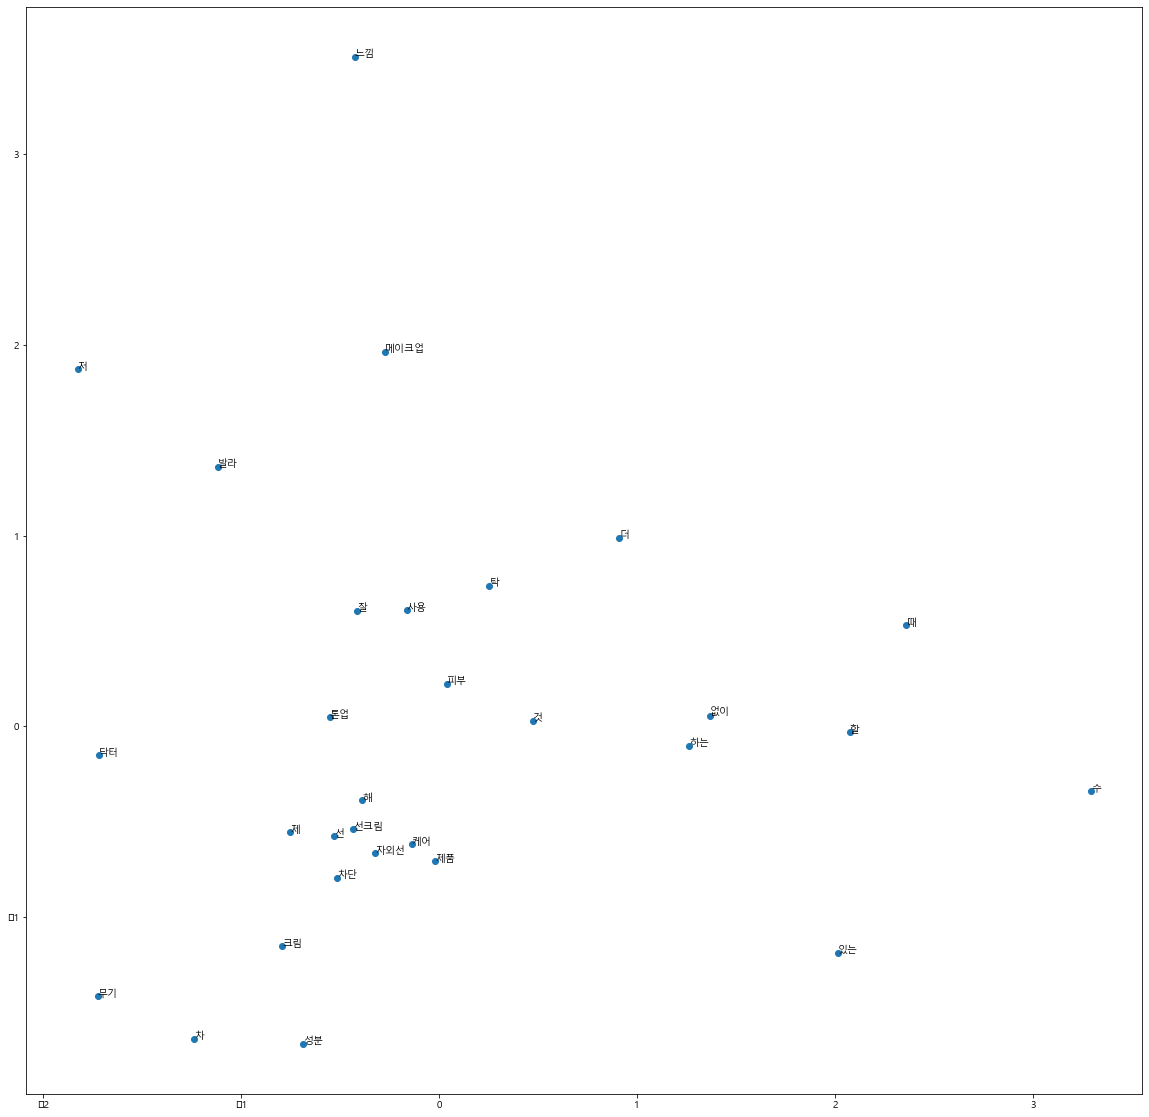

In [148]:
make_scatter(vocaps,x,y)

않좋은 단어를 발견하기 어렵기 때문에 반대 단어를 찾아보기 어렵다.

### 2. noun model

In [149]:
word_vectors = model_Noun.wv
#vocaps = word_vectors.vocab.keys()
most_vocas = Counter(d_1["Noun"].sum()).most_common(200)
vocaps = [v[0] for v in most_vocas]
word_vec_list = [word_vectors[v] for v in vocaps]

In [150]:
pca = PCA(n_components=3)
xy = pca.fit_transform(word_vec_list)
x = xy[:,0]
y = xy[:,1]

C:\Users\Samsung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Samsung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


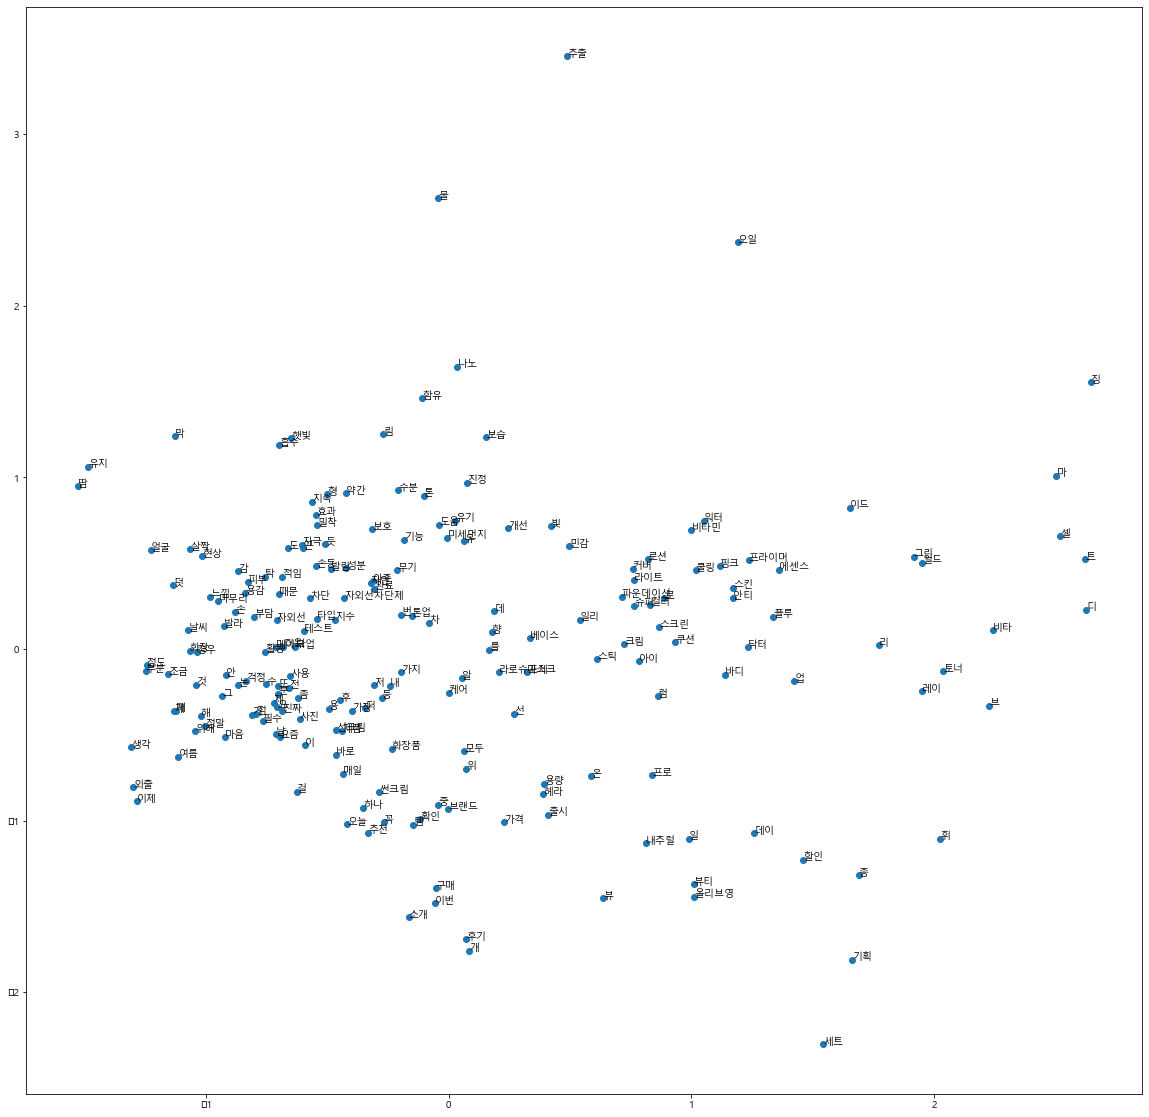

In [151]:
make_scatter(vocaps,x,y)

### 3. Adj model

In [152]:
word_vectors = model_adj.wv
#vocaps = word_vectors.vocab.keys()
most_vocas = Counter(d_1["Adjective"].sum()).most_common(200)
vocaps = [v[0] for v in most_vocas]
word_vec_list = [word_vectors[v] for v in vocaps]

In [153]:
pca = PCA(n_components=3)
xy = pca.fit_transform(word_vec_list)
x = xy[:,0]
y = xy[:,1]

C:\Users\Samsung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Samsung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


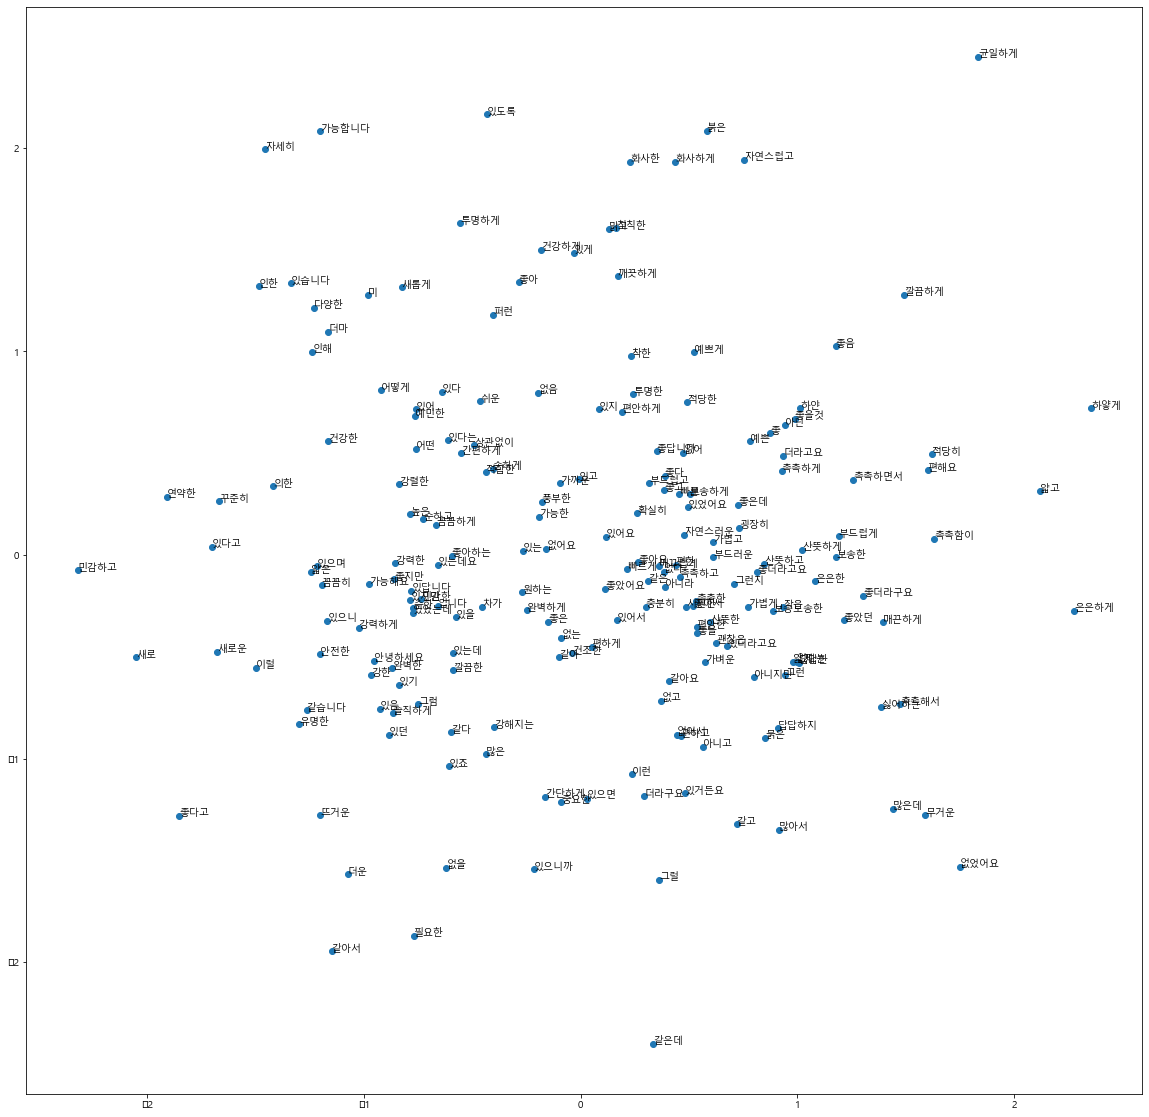

In [154]:
make_scatter(vocaps,x,y)

In [136]:
window_size = 10
target = "없음"
extraction = []
for i in tqdm(d_1["naver_blog_review"]):
    sentences = i.split("  ")
    #print(sentences)
    #break
    for senten in sentences:
        if target in senten:
            index_ = senten.find(target)
            try:
                extraction.append(senten[index_-window_size:index_+window_size])
            except:
                pass
            #print(senten)
        #print("_"*40)

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1184.46it/s]


In [137]:
extraction

[' 함)눈시림 5 (없음!!)피부트러블',
 '에요 끈적임 1도 없음',
 '. 끈적임은 1도 없음!!',
 ' 화끈거림 증상이 없음을 안자극 테스',
 ' 화끈거림 증상이 없음이검증됐기에 더',
 '은.. 사용할때는 없음, 가격이 확 ',
 '리무버, 이만한게 없음클렌징워터 쓰기',
 '',
 '싸다 재구매 의사 없음, 노우',
 "매 의사도 지금은 없음', '안녕하세",
 ', 딱히 메리트가 없음.',
 '느 뷰스타가 이거 없음 못산다고 하여',
 '적음,눈시림 현상 없음.∙ 단점: 백',
 '들거림, 밀림현상 없음-끈적임 없이 ',
 '(얼굴 윤곽에 백탁없음)*선크림 특유',
 '들거림, 밀림현상 없음✔️쿠션, 파운',
 '도 하고 눈시림이 없음미세먼지차단,워',
 '입니다. ㅠㅠ이거 없음 밖에 나가기 ',
 '은 걱정할 필요도 없음! 적당한 영양',
 '것 처럼 백탁현상 없음!!& 쿠션 파',
 '덧발라도 백탁현상 없음✔️피부 온도를',
 '성비는 말할 것도 없음.',
 '투명해요 (백탁현상없음)',
 '먼저 (논리 1도 없음) 장윤정이 콕',
 '록 기획세트, 해당없음, 해당없음, ',
 '록 기획세트, 해당없음, 해당없음, ',
 '도로 차이가 거의 없음파란자차는 크림',
 '임,유분기가 전혀 없음!(ㅇㄱㄹㅇ 진',
 '원으로 다소 양심 없음.) 단독 징크',
 '르기 굿#각질부각 없음 #파데궁합 상',
 '무기자차#각질부각 없음 & 화장궁합 ',
 '마무리는 번들거림 없음. 백탁도 바른',
 '만 끈적임은 1도 없음.메이크업 베이',
 '주니 백탁현상 전혀없음 !',
 '다 눈시림&트러블 없음 *결론심한 백']

In [157]:
window_size = 60
target = ["단점","피부"]
extraction = []
for i in tqdm(d_1["naver_blog_review"]):
    sentences = i.split("  ")
    #print(sentences)
    #break
    for senten in sentences:
        if target in senten:
            index_ = senten.find(target)
            try:
                extraction.append(senten[index_-window_size:index_+window_size])
            except:
                pass
            #print(senten)
        #print("_"*40)

100%|████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 1303.28it/s]


In [158]:
extraction

[' 하얀색 텍스쳐가 아닌 약간 분홍,살구색의 텍스쳐를 가지고 있어요!하지만 마스크에는 묻어나지 않아서 유색의 단점은 없었답니다! 2. 발림성저는 선크림 구매할 때 발림성을 굉장히 중요시 여기고 있어요!각질이 쉽게 일어',
 '총정리: ★★★★☆ (장/단점)',
 '량 제품이 구비되어 있어 용량 선택의 폭이 넓다는 점!4. 일반 자외선 뿐만 아니라 블루라이트까지 차단! ※단점1. 보송한 마무리지만 지성 피부여서인지 파우더로 마무리해주지 않으면 지속력이 살짝 아쉽다는 점!2. 투',
 '장단점 및 총평가',
 '',
 '',
 ' 열로 방출하는 거라고 해요. 그래서 보통 무기자차 선크림이 더 순하고 민감성피부용으로 추천되는데 치명적인 단점이 백탁현상이 있고, 발림성이 엄청 좋지않다는 것그래서 무기자차가 더 순하다는거 알면서도 유기자차를 찾는',
 '톤업 효과가 있는 제품이라 확실히 제품 색 자체가 연한 베이지색이더라구요. 보통 무기자차 제품은 뻑뻑하다는 단점이 있는데 손등에서 미끄러질 정도로수분감이 몽글몽글하게 느껴져요. 선크림보단 수분 에센스로 느껴질 정도였',
 '있는데,',
 '은 기분이 들어요! 그런 생각이 들어도 ',
 '임 없이 가볍게 밀착되는것이 특징!! 수분워터드롭형 제형은 주르륵 흘러내리거나 바르기 불편하고지저분해 지는 단점이 있는데 비타브리드는 너무 뻑뻑하지도 않고적당한 제형으로 부드럽게 잘 발리면서도 수분감이 충만 하더라구',
 '의 제형으로 깔끔하게 발리고 톤업 효과까지 있어부담이 없었답니다. 너무 뻑뻑해도 너무 물같은 제형이여도 다 단점이 있더라구요.',
 '',
 '',
 '리페어 선크림은 발림성이 부드러워서 편하고 빠르게 도포해줄 수 있답니다.',
 ' 있는데파티온선크림은 뻑뻑함이 전~혀 없답니다. 햇빛을 반사시키는 무기자차의 장점은 가져가되뻑뻑한 발림성의 단점은완벽히 지운 선크림이라 할 수 있겠어요.',
 '피부에는 자극적일 수 있다해서 아이들에게도 무기자차를 바르게 하시는 분들도 많으신데요~ 대신에 무기자차에는 단점이 있어요.우선 

In [160]:
len(d_1)

43

In [103]:
docu_,topic_words = topic_moding(5,d_1["N_adj"])

for i in range(len(docu_)):
    docu_1 = docu_[i]
    try:
        topic_most =  docu_1.most_common(1)[0][0]
        #print(topic_most)
        words = topic_words[topic_most].most_common(4)
        print(words)
    except:
        print("None")

[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000)]
[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
None
None
[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932)]
None
[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960)]
[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932)]
[('피부', 1634), ('선크림

In [107]:
docu_[1]

Counter({4: 2240, 2: 2224, 3: 2228, 0: 2248, 1: 2304})

In [142]:
for i in topic_words:
    print(i.most_common(10))

[('피부', 1698), ('선크림', 1376), ('제품', 972), ('사용', 932), ('선', 820), ('자외선', 752), ('차단', 658), ('수', 602), ('것', 530), ('성분', 464)]
[('피부', 1690), ('선크림', 1326), ('사용', 962), ('제품', 960), ('선', 906), ('자외선', 772), ('차단', 646), ('수', 590), ('것', 496), ('성분', 454)]
[('피부', 1670), ('선크림', 1306), ('제품', 1016), ('사용', 966), ('선', 884), ('자외선', 714), ('차단', 650), ('수', 512), ('것', 436), ('성분', 430)]
[('피부', 1686), ('선크림', 1382), ('사용', 1004), ('제품', 968), ('선', 768), ('자외선', 692), ('차단', 644), ('수', 552), ('것', 504), ('케어', 444)]
[('피부', 1634), ('선크림', 1320), ('제품', 1008), ('사용', 1000), ('선', 828), ('자외선', 720), ('차단', 690), ('수', 574), ('것', 462), ('성분', 410)]


In [161]:
file_naver

['01 스킨 케어_네이버.xlsx',
 '02 맨 케어_네이버.xlsx',
 '03 컬러 메이크업_네이버.xlsx',
 '04 베이스 메이크업_네이버.xlsx',
 '05 프래그런스_네이버.xlsx',
 '06 스타일러_네이버.xlsx',
 '07 이너 뷰티_네이버.xlsx',
 '08 선 케어_네이버.xlsx',
 '09 보디 케어_네이버.xlsx',
 '10 헤어 케어_네이버.xlsx']

In [162]:
file_insta

['01 스킨 케어_인스타그램.xlsx',
 '02 맨 케어_인스타그램.xlsx',
 '03 컬러 메이크업_인스타그램.xlsx',
 '04 베이스 메이크업_인스타그램.xlsx',
 '05 프래그런스_인스타그램.xlsx',
 '06 스타일러_인스타그램.xlsx',
 '07 이너 뷰티_인스타그램.xlsx',
 '08 선 케어_인스타그램.xlsx',
 '09 보디 케어_인스타그램.xlsx',
 '10 헤어 케어_인스타그램.xlsx']

In [163]:
d_1.head()

,브랜드명,브랜드명(영문),제품명(한글),제품명(영문),출시일자,기타,naver_blog_count,naver_blog_review,tag,words,ig,only,Noun,Adjective,N_adj,Verb
0,이니스프리,innisfree,트루케어 논나노 논코메도 무기자차 SPF48,TRUECARE Non-nano Sunscreen SPF48,2019년 9월 디자인 AD,"#핑크자차, #논나노선크림, #트루케어",138,['이니스프리 트루케어 논나노 논코메도 무기자차 선크림 SPF48 PA+++가격 ￦...,"[([', Punctuation), (이니스프리, Noun), (트루, Noun),...","[[', 이니스프리, 트루, 케어, 논, 나노, 논코, 메도, 무기, 자, 차, 선...","[이니스프리, 트루, 케어, 논, 나노, 논코, 메도, 무기, 차, 선크림, SPF...","[이니스프리, 트루, 케어, 논, 나노, 논코, 메도, 무기, 차, 선크림, 가격,...","[이니스프리, 트루, 케어, 논, 나노, 논코, 무기, 차, 선크림, 가격, 용량,...","[어려웠던, 유명한, 높더라도, 있게되, 굉장히, 좋은, 작은, 가볍게, 편해요, ...","[이니스프리, 트루, 케어, 논, 나노, 논코, 무기, 차, 선크림, 가격, 용량,...","[메도, 해보기, 본, 남기려고, 합니다, 넘어가거나, 들고다니면서, 주는데요, 해..."
1,키엘,KIEHL’S,쿨링 자외선 차단제,Ultra light Daily UV Defense,19년 4월,키엘쿨링자외선차단제,93,['안녕하세요 다니캉입니당본격적으로 여름이 다가오니까 외출할 때 필수로 챙기게 되는...,"[([', Punctuation), (안녕하세요, Adjective), (다니, V...","[[', 안녕하세요, 다니, 캉, 입니당, 본격, 적, 으로, 여름, 이, 다가오니...","[안녕하세요, 다니, 캉, 입니당, 본격, 으로, 여름, 이, 다가오니까, 외출, ...","[안녕하세요, 다니, 캉, 입니당, 본격, 여름, 다가오니까, 외출, 할, 때, 필...","[캉, 본격, 여름, 외출, 때, 필수, 건, 바로, 자외선, 차단, 제, 저, 예...","[안녕하세요, 입니당, 아닐까, 같은, 있는데요, 있으면서, 가볍고, 자연스러운, ...","[안녕하세요, 캉, 입니당, 본격, 여름, 외출, 때, 필수, 건, 바로, 자외선,...","[다니, 다가오니까, 할, 챙기게, 되는, 싶어요, 챙기지, 않았는데, 큰, 받는다..."
2,라포티셀,LAPOTHICELL,에어리 핏 썬 스틱,Airy Fit Sun Stick,43909,"스틱자차, 보송자차, 보송자차",44,['안녕하세요 :D프소 입니다 꺄핳 날씨가 조금씩 더 더워지고 있죠?겨울엔 마스크 ...,"[([', Punctuation), (안녕하세요, Adjective), (:, Pu...","[[', 안녕하세요, :, D, 프소, 입니다, 꺄핳, 날씨, 가, 조금씩, 더, ...","[안녕하세요, D, 프소, 입니다, 꺄핳, 날씨, 가, 조금씩, 더, 더워지고, 있...","[안녕하세요, 프소, 입니다, 꺄핳, 날씨, 조금씩, 더, 더워지고, 있죠, 겨울,...","[프소, 꺄핳, 날씨, 더, 겨울, 마스크, 은근, 부분, 바람, 덜, 이, 보온,...","[안녕하세요, 입니다, 있죠, 있네, 이랬던, 같은데지, 답답하고, 더워서, 미치겠...","[안녕하세요, 프소, 입니다, 꺄핳, 날씨, 더, 있죠, 겨울, 마스크, 은근, 부...","[더워지고, 쓰고, 다니면, 가려지는, 닿아서, 쓰고, 다녀도, 하면, 오는데요, ..."
3,비타브리드C12,Vitabrid C12,올 데이 UV 디펜스,ALL DAY UV DEFENSE,2019.09,-,17,['다들 선크림 365일 바르고 계신가요?저는 몇년전까지는 여름에만 대충 바르고36...,"[([', Punctuation), (다, Adverb), (들, Verb), (선...","[[', 다, 들, 선크림, 365일, 바르고, 계신가요, ?, 저, 는, 몇, 년...","[다, 들, 선크림, 365일, 바르고, 계신가요, 저, 는, 몇, 년전, 까지는,...","[다, 들, 선크림, 바르고, 계신가요, 저, 년전, 여름, 대충, 바르고, 챙겨,...","[선크림, 저, 년전, 여름, 대충, 아이, 기미, 피부, 주름, 그때, 시작, 자...","[계신가요, 부지런하게, 안될, 보송보송한, 안전하게, 가볍게, 없어요, 좋아요, ...","[선크림, 계신가요, 저, 년전, 여름, 대충, 아이, 기미, 피부, 주름, 그때,...","[들, 바르고, 바르고, 챙겨, 바르지, 않았었는데요, 낳고, 하면서, 올라오고, ..."
4,안나수이,ANNA SUI,수이블랙 UV 프라이머 워터 SPF30 PA+++,SUI BLACK UV Primer Water SPF 30 PA+++,2020년 3월,안나수이프라이머,14,['안녕하세요. 뷰티 블로거 Diana 에요 : )이번에 안나수이에서 프라이머 워터...,"[([', Punctuation), (안녕하세요, Adjective), (., Pu...","[[', 안녕하세요, ., 뷰티, 블로거, Diana, 에요, :, ), 이번, 에...","[안녕하세요, 뷰티, 블로거, Diana, 에요, 이번, 에, 안나, 수이, 에서,...","[안녕하세요, 뷰티, 블로거, 이번, 안나, 수이, 프라이머, 워터, 신제품, 출시...","[뷰티, 블로거, 이번, 안나, 수이, 프라이머, 워터, 신제품, 출시, 기존, 프...","[안녕하세요, 빠르게, 매끈함은, 좋았지만, 실패하면, 신중하게, 가볍게, 매끄럽게...","[안녕하세요, 뷰티, 블로거, 이번, 안나, 수이, 프라이머, 워터, 신제품, 출시...","[되어, 가져와, 봤어여, 하죠, 되는데요, 보여, 드리는, 할, 보여, 드릴께요,..."


In [164]:
d_1["naver_blog_count"].sum()

3239